# Problem Statement

A care management organisation called WeCare wants to identify among its diabetic patients, the ones that are at high risk of getting re-admitted to the hospital. They wish to intervene by providing some incentive to these patients that will help them improve their health. Task is to identify high-risk diabetic patients through risk stratification. This will help the payer to decide what are the right intervention programs for these patients.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing and reading the csv file

data = pd.read_csv(r"C:\Users\dell\Documents\2. UpGrad\2. Assignments\7. Payer Analytics\diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Checking the shape of data

data.shape

(101766, 50)

In [4]:
# Checking datatypes of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Data Cleaning

In [6]:
# The info says that there are no null values in any column. 
# But if we see the data, we find some '?' in it. This should be treated.
# Replacing those values with 'NaN'.

data = data.replace(to_replace = '?', value = np.NaN)

In [7]:
# Identifying the number of null values.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# .isnull() command by default gives the null values in columns
# .sum() sums up the missing values (column-wise)

data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# Summing up the missing values in columns
# Total missing values in each column is divided by total number of rows 
# Total number of rows is obtained by length of the index column
# The obtained value is multiplied by 100 to get the percentage and rounded off up to 2 decimal points

round(100*(data.isnull().sum()/len(data.index)), 2)

encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

In [10]:
# Clearly the variable 'weight' has 96% missing values. So dropping that column.

data = data.drop(['weight'], axis = 1)

In [11]:
data.shape

(101766, 49)

In [12]:
# Checking the category wise distribution to replace the null values.
# Calculating the percentage of frequency of each category

round(100*(data['race'].value_counts()/len(data.index)), 2)

Caucasian          74.78
AfricanAmerican    18.88
Hispanic            2.00
Other               1.48
Asian               0.63
Name: race, dtype: float64

In [13]:
# As majority of them belong to 'Caucasian' race, replacing the NaN values with the same in this column.

data['race'].fillna(data['race'].mode()[0], inplace = True)

In [14]:
round(100*(data.isnull().sum()/len(data.index)), 2)

encounter_id                 0.00
patient_nbr                  0.00
race                         0.00
gender                       0.00
age                          0.00
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide                0.00
glipizide     

In [15]:
# Payer code column indicates Integer identifier corresponding to 23 distinct values.
# For example, Blue Cross/Blue Shield, Medicare, and self-pay.
# Checking the category wise distribution to replace the null values.
# Calculating the percentage of frequency of each category

round(100*(data['payer_code'].value_counts()/len(data.index)), 2)

MC    31.88
HM     6.17
SP     4.92
BC     4.57
MD     3.47
CP     2.49
UN     2.41
CM     1.90
OG     1.02
PO     0.58
DM     0.54
CH     0.14
WC     0.13
OT     0.09
MP     0.08
SI     0.05
FR     0.00
Name: payer_code, dtype: float64

**Of the 60% non-null values, around 30% were having the payer code 'MC' (which might indicate the 'Medicare' payment, Medicare is a Government-sponsored health insurance which provides coverage to people who are more than 65 years old or people who have a disability) and the rest 30% is distributed across different payers.**

**Now if we replace the remaining 40% null values with the mode, this would take up the contribution of 'MC' to 70%. I don't think this would effect our analysis strongly. So replacing the null values with mode.**

In [16]:
data['payer_code'].fillna(data['payer_code'].mode()[0], inplace = True)

In [17]:
round(100*(data.isnull().sum()/len(data.index)), 2)

encounter_id                 0.00
patient_nbr                  0.00
race                         0.00
gender                       0.00
age                          0.00
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                   0.00
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide                0.00
glipizide     

In [18]:
# The variable 'medical_specialty' has around 50% null values.
# This column denotes the specialty for example, cardiology, internal medicine, family/general practice, and surgeon.

round(100*(data['medical_specialty'].value_counts()/len(data.index)), 2)

InternalMedicine                        14.38
Emergency/Trauma                         7.43
Family/GeneralPractice                   7.31
Cardiology                               5.26
Surgery-General                          3.05
Nephrology                               1.59
Orthopedics                              1.38
Orthopedics-Reconstructive               1.21
Radiologist                              1.12
Pulmonology                              0.86
Psychiatry                               0.84
Urology                                  0.67
ObstetricsandGynecology                  0.66
Surgery-Cardiovascular/Thoracic          0.64
Gastroenterology                         0.55
Surgery-Vascular                         0.52
Surgery-Neuro                            0.46
PhysicalMedicineandRehabilitation        0.38
Oncology                                 0.34
Pediatrics                               0.25
Hematology/Oncology                      0.20
Neurology                         

**Now looking at the category wise distribution, out of the 50% non-null values, only 14% belong to 'Internal Medicine' and the rest are distributed widely across 71 specialities.** 

**So replacing the remaining 50% null values blindly with mode will definitely lead us to the wrong path. So dropping the column.**

In [19]:
data = data.drop(['medical_specialty'], axis = 1)

In [20]:
round(100*(data.isnull().sum()/len(data.index)), 2)

encounter_id                0.00
patient_nbr                 0.00
race                        0.00
gender                      0.00
age                         0.00
admission_type_id           0.00
discharge_disposition_id    0.00
admission_source_id         0.00
time_in_hospital            0.00
payer_code                  0.00
num_lab_procedures          0.00
num_procedures              0.00
num_medications             0.00
number_outpatient           0.00
number_emergency            0.00
number_inpatient            0.00
diag_1                      0.02
diag_2                      0.35
diag_3                      1.40
number_diagnoses            0.00
max_glu_serum               0.00
A1Cresult                   0.00
metformin                   0.00
repaglinide                 0.00
nateglinide                 0.00
chlorpropamide              0.00
glimepiride                 0.00
acetohexamide               0.00
glipizide                   0.00
glyburide                   0.00
tolbutamid

In [21]:
# Now we are left with the columns 'diag_1', 'diag_2', 'diag_3' which have less than 2% null values.
# 'diag_1' denotes the primary diagnosis (coded as first three digits of ICD9); 848 distinct values.
# 'diag_2' denotes Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values.
# 'diag_3' denotes Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values.

round(100*(data['diag_1'].value_counts()/len(data.index)), 2)

428    6.74
414    6.47
786    3.95
410    3.55
486    3.45
       ... 
V67    0.00
389    0.00
325    0.00
375    0.00
412    0.00
Name: diag_1, Length: 716, dtype: float64

**As seen from the above distrbution, there are 716 different non-null codes for the variable 'diag_1'.**

**Also from the data dictionary, it is clear that the variables 'diag_2' and 'diag_3' have 923 and 954 distinct codes assigned.** 

**So imputing the null values in these three columns will not make any sense as the codes are assigned for each patient based on their disease condition, seriousness and comorbidities. Dropping the rows with null values will be correct.** 

In [22]:
# Dropping the rows with null values.

data = data.dropna()

In [23]:
# Checking for null values if any.

data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [24]:
# Resetting the index.

data = data.reset_index(drop = True)

In [25]:
data.shape

(100244, 48)

**We have dropped 2 columns - 'weight' & 'medical_specialty' and 1522 rows.**

In [26]:
# Checking if the datatypes are correctly matched.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100244 entries, 0 to 100243
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100244 non-null  int64 
 1   patient_nbr               100244 non-null  int64 
 2   race                      100244 non-null  object
 3   gender                    100244 non-null  object
 4   age                       100244 non-null  object
 5   admission_type_id         100244 non-null  int64 
 6   discharge_disposition_id  100244 non-null  int64 
 7   admission_source_id       100244 non-null  int64 
 8   time_in_hospital          100244 non-null  int64 
 9   payer_code                100244 non-null  object
 10  num_lab_procedures        100244 non-null  int64 
 11  num_procedures            100244 non-null  int64 
 12  num_medications           100244 non-null  int64 
 13  number_outpatient         100244 non-null  int64 
 14  numb

**All the datatypes are correctly matched.**

# Data Preparation

## Checking for any duplicate rows/columns.

A patient might visit the hospital on different health issues in different time periods. These entries will not be termed as duplicate. So I'm checking for the duplicate rows/columns based on the entire data and not on few criteria like patient number etc.

In [27]:
# Finding duplicate rows.

data.duplicated().sum()

0

In [28]:
# Finding duplicate columns.
# Transposing the dataset as in general, duplicated() function works on rows.

data.T.duplicated()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                  False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide     

**We don't have any duplicate rows. But we have duplicates for the column 'citoglipton' as we got 'True' for that column. So, dropping that column and moving further.**

In [29]:
data = data.drop(['citoglipton'], axis = 1)

In [30]:
data.shape

(100244, 47)

In [31]:
data.duplicated().sum()

0

In [32]:
data.T.duplicated()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                  False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide     

**Now, we don't have any duplicates in our data.**

## Changing the variable 'readmitted' to binary type by clubbing the values ">30" and "<30" as "YES".

In [33]:
# Mapping the '>30' and '<30' values of variable 'readmitted' to 'YES'

data.readmitted[data.readmitted == '>30'] = 'YES'
data.readmitted[data.readmitted == '<30'] = 'YES'

In [34]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,YES


## Create the derived metric 'comorbidity'

- This metric is derived based on two disease conditions - DIABETES AND CIRCULATORY DISEASES. 
- A pateint is termed to have diabetes if the patient is diagnosed with an ICD 9 code in the form of 250.xx.
- Similarly, a pateint is termed to have a circulatory disease if the patient is diagnosed with an ICD 9 code lying in the range of 390 to 459.
- In our data, I found some patients on diabetes medications even if there are no codes relating to diabetes (250.xx) in any of the diagnoses (diag_1, diag_2 and diag_3). This might happen when the patient might visit the hospital with another health issue and is already diabetic. So now, doctor will already have the relavent medical history. There is no need to diagnose for diabetes again in these case.
- So, I'm deriving the metric as diabetic if either the patient has any one of the diagnosis code in the form of 250.xx or if there is a 'YES' in the column 'diabeticMed' (this column indicates whether the patient is taking the diabetes medication or not).
- I'm deriving the comorbidity metric as 'yes' if any of the three diagnoses codes have the value in the range 390 to 459, else 'no'. 
- Because a patient might enter the hospital with a different health condition and primary diagnoses which is diag_1 will only perform the diagnoses related to the pertaining and informed health issue by the patient. 
- So, it may not report the presence of any comorbidity like circulatory diseases. Secondary and additional diagnoses (diag_2 and diag_3) might reveal any of the above mentioned conditions.
- Hence, I'm considering all the three diagnoses codes along with the diabetesMed column to conclude whether or not the patient has the diabetes and circulatory comorbidities.

In [35]:
# Deriving a new metric 'diabetic' by combining the data from 'diabetes_1', 'diabetes_2', 'diabetes_3' and 'diabetes_4'.
# 'Yes' if there is a diabetic code 250.xx in any of the diagnoses codes (diag_1, diag_2, diag_3).
# 'Yes' if there is a 'Yes' in the column 'diabetesMed'.
# 'No' if the above criteria donot meet.

a = list(data['diag_1'])

b = pd.to_numeric(a, errors = 'coerce')

c = list(b)

diabetes_1 = ['Yes' if i > 250 and i < 251 else 'No' for i in c]

diabetes_1 = pd.DataFrame(diabetes_1, columns = ['Diabetes_1'])

In [36]:
a = list(data['diag_2'])

b = pd.to_numeric(a, errors = 'coerce')

c = list(b)

diabetes_2 = ['Yes' if i > 250 and i < 251 else 'No' for i in c]

diabetes_2 = pd.DataFrame(diabetes_2, columns = ['Diabetes_2'])

In [37]:
a = list(data['diag_3'])

b = pd.to_numeric(a, errors = 'coerce')

c = list(b)

diabetes_3 = ['Yes' if i > 250 and i < 251 else 'No' for i in c]

diabetes_3 = pd.DataFrame(diabetes_3, columns = ['Diabetes_3'])

In [38]:
diabetes_4 = ['Yes' if i == 'Yes' else 'No' for i in data['diabetesMed']]

diabetes_4 = pd.DataFrame(diabetes_4, columns = ['Diabetes_4'])

In [39]:
diabetes = pd.concat([diabetes_1, diabetes_2, diabetes_3, diabetes_4], axis = 1)

diabetes

,Diabetes_1,Diabetes_2,Diabetes_3,Diabetes_4
0,No,Yes,No,Yes
1,No,No,No,Yes
2,No,Yes,No,Yes
3,No,No,No,Yes
4,No,No,No,Yes
...,...,...,...,...
100239,Yes,No,No,Yes
100240,No,No,No,Yes
100241,No,No,No,Yes
100242,No,No,No,Yes


In [40]:
# Transposing the dataframe to check for all 'No' using .all() function.
# Assigning it to a new variable diabetic.

transpose = diabetes.T

diabetic = ['No' if (transpose[i] == 'No').all() else 'Yes' for i in transpose]

diabetic = pd.DataFrame(diabetic, columns = ['Diabetic'])

In [41]:
# Similarly, deriving the code for circulatory disease based on 'diag_1', 'diag_2', 'diag_3'.

a = list(data['diag_1'])

b = pd.to_numeric(a, errors = 'coerce')

c = list(b)

circulatory_1 = ['Yes' if i in range(390, 460) else 'No' for i in c]

circulatory_1 = pd.DataFrame(circulatory_1, columns = ['Circulatory_1'])

In [42]:
a = list(data['diag_2'])

b = pd.to_numeric(a, errors = 'coerce')

c = list(b)

circulatory_2 = ['Yes' if i in range(390, 460) else 'No' for i in c]

circulatory_2 = pd.DataFrame(circulatory_2, columns = ['Circulatory_2'])

In [43]:
a = list(data['diag_3'])

b = pd.to_numeric(a, errors = 'coerce')

c = list(b)

circulatory_3 = ['Yes' if i in range(390, 460) else 'No' for i in c]

circulatory_3 = pd.DataFrame(circulatory_3, columns = ['Circulatory_3'])

In [44]:
circulatory = pd.concat([circulatory_1, circulatory_2, circulatory_3], axis = 1)

circulatory

,Circulatory_1,Circulatory_2,Circulatory_3
0,No,No,No
1,No,No,No
2,No,No,Yes
3,No,No,No
4,Yes,Yes,No
...,...,...,...
100239,No,No,Yes
100240,No,No,No
100241,No,No,No
100242,No,No,No


In [45]:
# Transposing the dataframe to check for all 'No' using .all() function.
# Assigning it to new variable circulatory_comorbid.

transpose = circulatory.T

circulatory_comorbid = ['No' if (transpose[i] == 'No').all() else 'Yes' for i in transpose]

circulatory_comorbid = pd.DataFrame(circulatory_comorbid, columns = ['Circulatory_comorbid'])

In [46]:
# Creating a dataframe 'comorbid' with the final codes for diabetes and circulatory disease.

comorbid = pd.concat([diabetic, circulatory_comorbid], axis = 1)

In [47]:
# Assigning codes 0,1,2,3 for identifying the risk of comorbidities.

conditions = [(comorbid['Diabetic'] == 'No') & (comorbid['Circulatory_comorbid'] == 'No'), 
              (comorbid['Diabetic'] == 'Yes') & (comorbid['Circulatory_comorbid'] == 'No'), 
              (comorbid['Diabetic'] == 'No') & (comorbid['Circulatory_comorbid'] == 'Yes'), 
              (comorbid['Diabetic'] == 'Yes') & (comorbid['Circulatory_comorbid'] == 'Yes')]

values = [0, 1, 2, 3]

comorbid['Comorbidity'] = np.select(conditions, values)

In [48]:
comorbid

,Diabetic,Circulatory_comorbid,Comorbidity
0,Yes,No,1
1,Yes,No,1
2,Yes,Yes,3
3,Yes,No,1
4,Yes,Yes,3
...,...,...,...
100239,Yes,Yes,3
100240,Yes,No,1
100241,Yes,No,1
100242,Yes,No,1


In [49]:
# Adding the column 'Comorbidity' to our original dataframe.

data = pd.concat([data, comorbid['Comorbidity']], axis = 1)

data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Comorbidity
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,1
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,1
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,3
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,MC,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,YES,3


In [50]:
# Changing the datatype of comorbidity from int to object.

data['Comorbidity'] = data['Comorbidity'].astype('object')

# Data exploration

In [51]:
# Extracting the categorical and numeric columns.

cat_cols = data.select_dtypes(include = ['object']).columns
num_cols = data.select_dtypes(include = ['int64']).columns

In [52]:
# Dividing the data based on the variable 'readmitted' and visualizing based on it.

data_0 = data.loc[data['readmitted'] == 'NO']
data_1 = data.loc[data['readmitted'] == 'YES']

### Univariate analysis of categorical columns.

In [53]:
def viz(data, data_0, data_1, column):
    
    data = data
    data_0 = data_0
    data_1 = data_1
    col = column
    
    fig = plt.figure(figsize = (13,10))
    
    ax1 = plt.subplot(221)
    data[col].value_counts().plot.pie(autopct = "%1.0f%%", ax = ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x = column, hue = 'readmitted', data = data, ax = ax2)
    plt.xticks(rotation = 90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0'] = ((data_0[col].value_counts())/len(data_0))
    df['1'] = ((data_1[col].value_counts())/len(data_1))
    df.plot.bar(ax = ax3)
    plt.title('Plotting data for target in terms of percentage')

    fig.tight_layout()

    plt.show()

In [54]:
cat_cols

Index(['race', 'gender', 'age', 'payer_code', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Comorbidity'],
      dtype='object')

In [55]:
# Removing the columns 'diag_1', 'diag_2', 'diag_3', 'readmitted' from the cat_cols list.

cols_1 = cat_cols.drop(['diag_1', 'diag_2', 'diag_3', 'readmitted'])
cols_1

Index(['race', 'gender', 'age', 'payer_code', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'Comorbidity'],
      dtype='object')

Plotting race


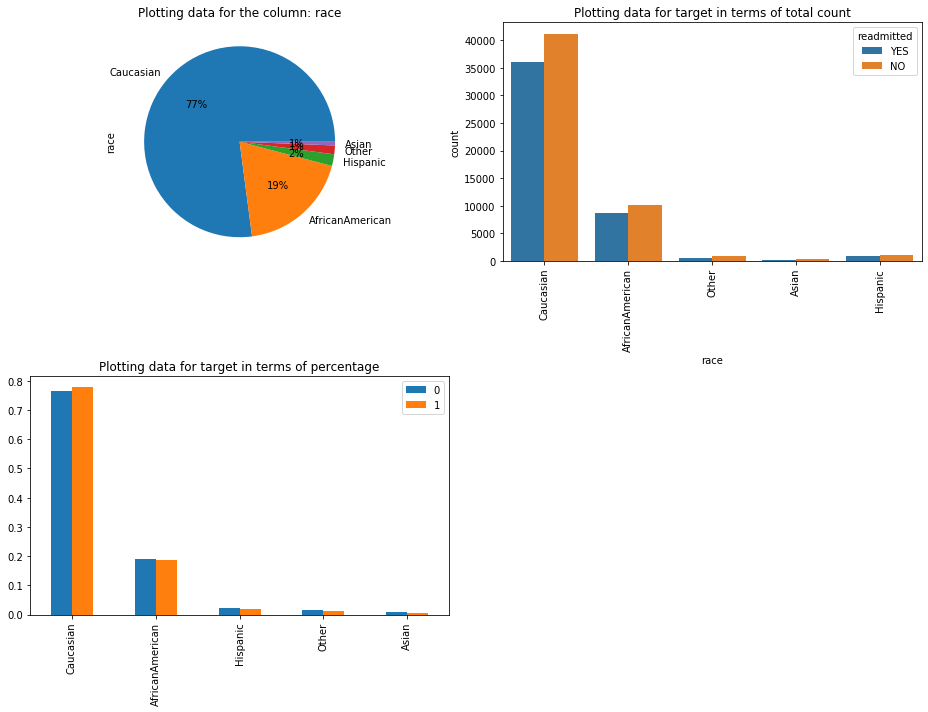

----------------------------------------------------------------------------------------------
Plotting gender


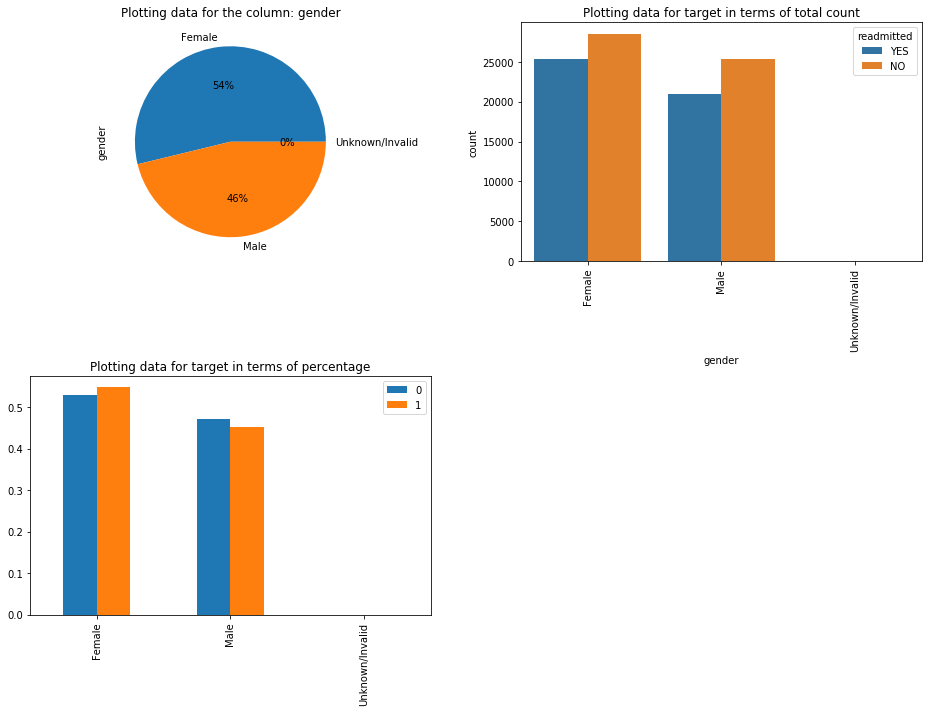

----------------------------------------------------------------------------------------------
Plotting age


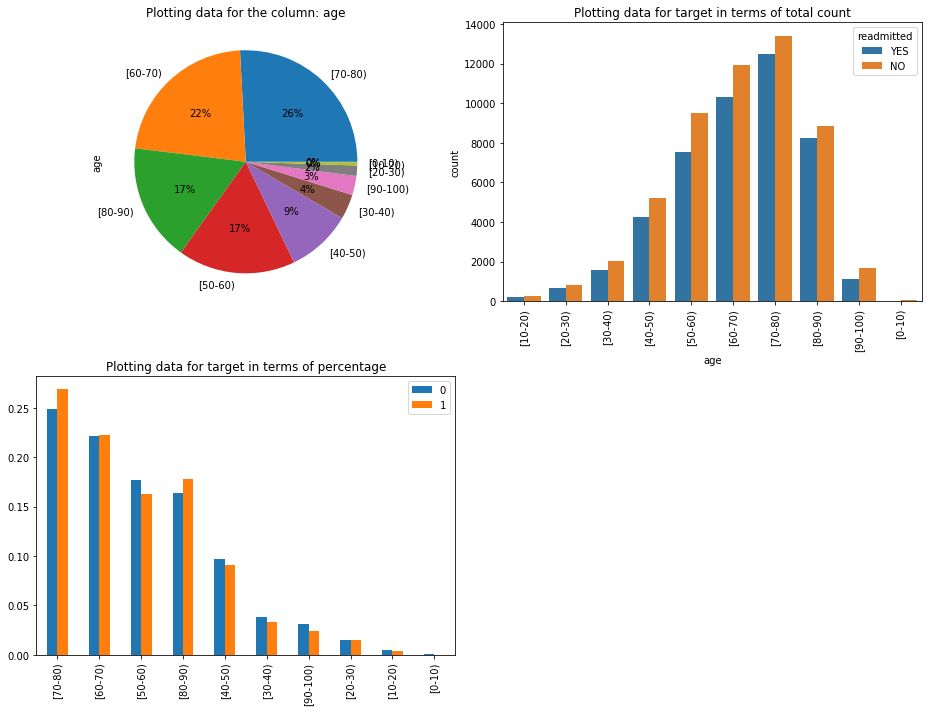

----------------------------------------------------------------------------------------------
Plotting payer_code


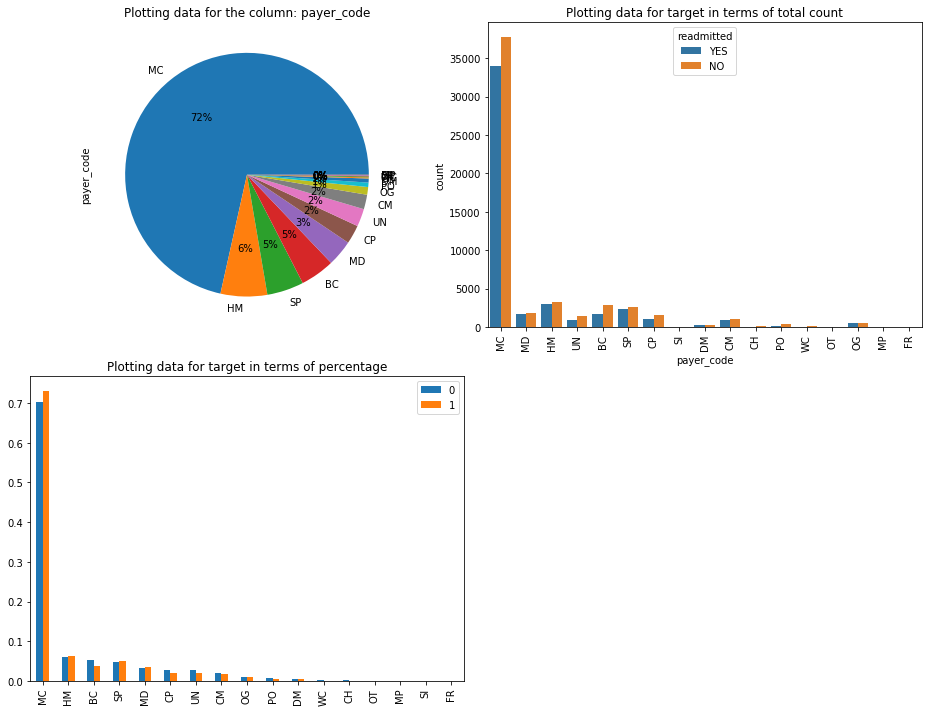

----------------------------------------------------------------------------------------------
Plotting max_glu_serum


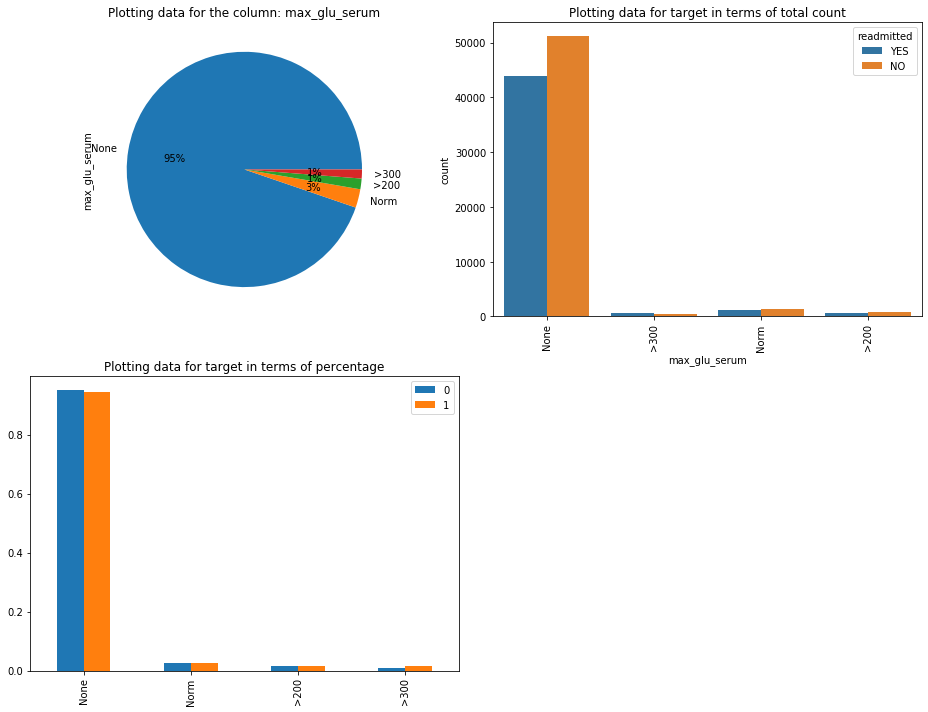

----------------------------------------------------------------------------------------------
Plotting A1Cresult


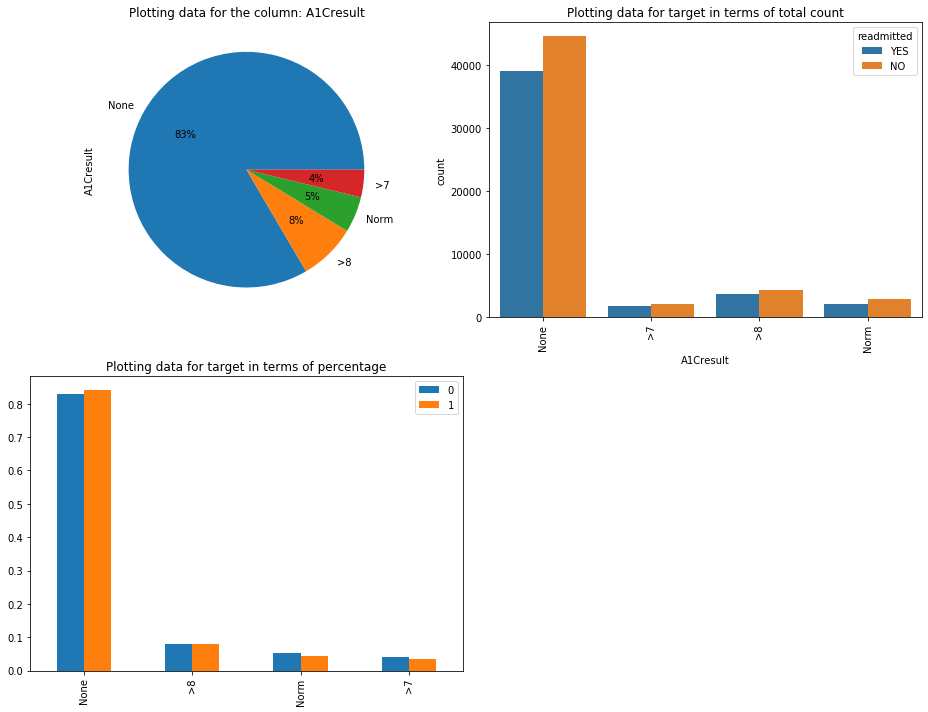

----------------------------------------------------------------------------------------------
Plotting metformin


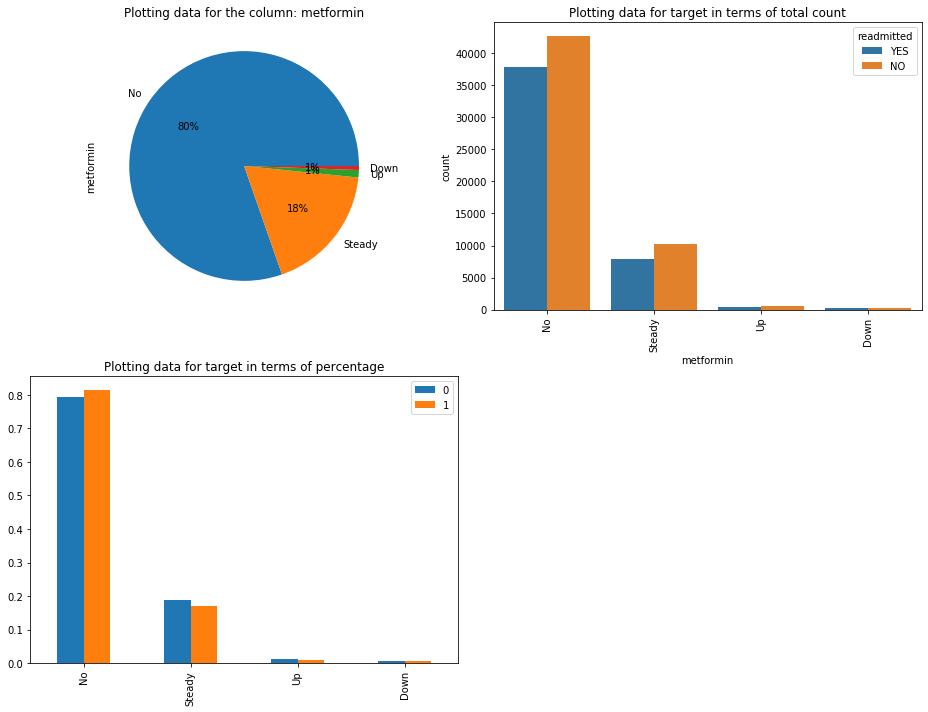

----------------------------------------------------------------------------------------------
Plotting repaglinide


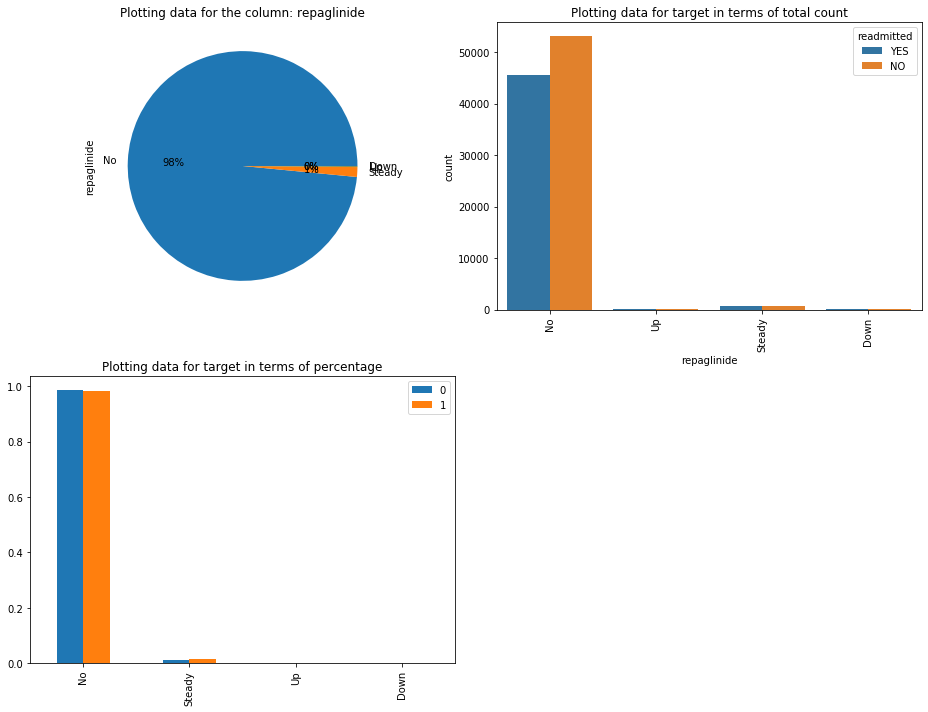

----------------------------------------------------------------------------------------------
Plotting nateglinide


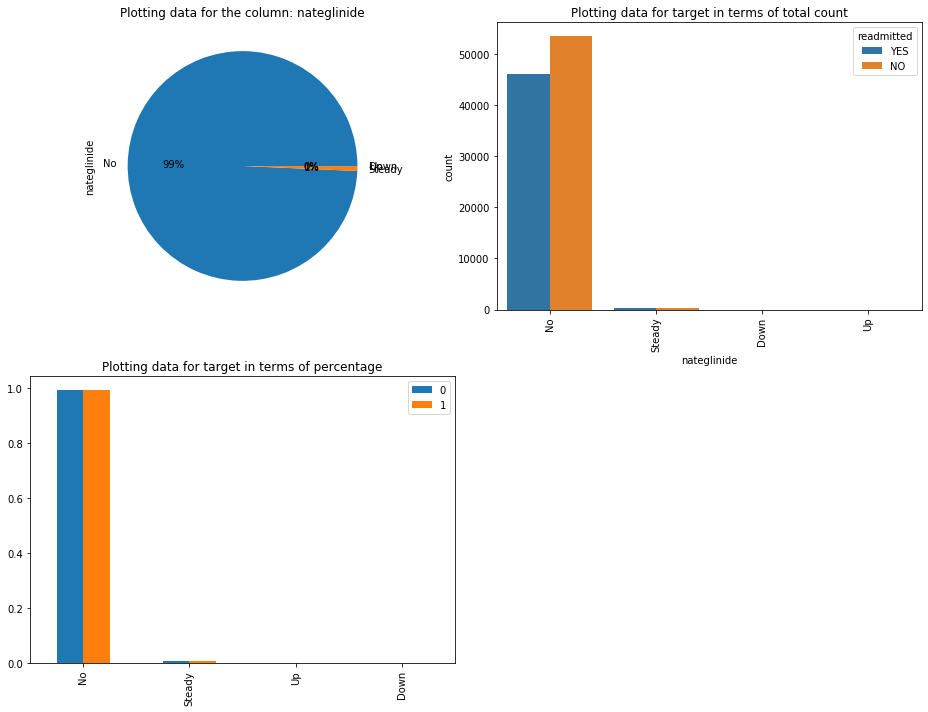

----------------------------------------------------------------------------------------------
Plotting chlorpropamide


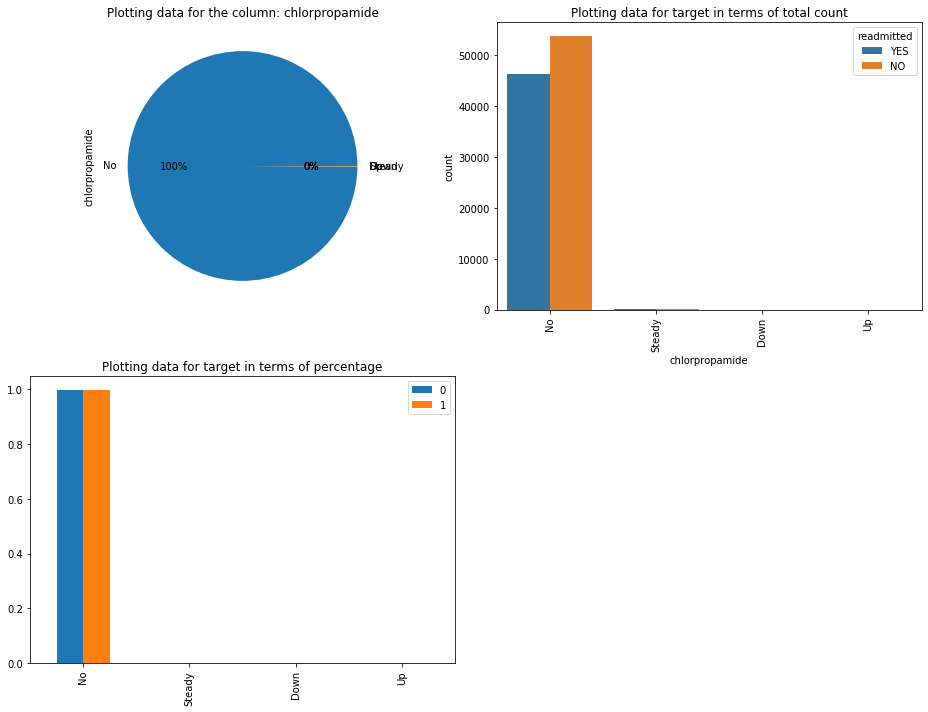

----------------------------------------------------------------------------------------------
Plotting glimepiride


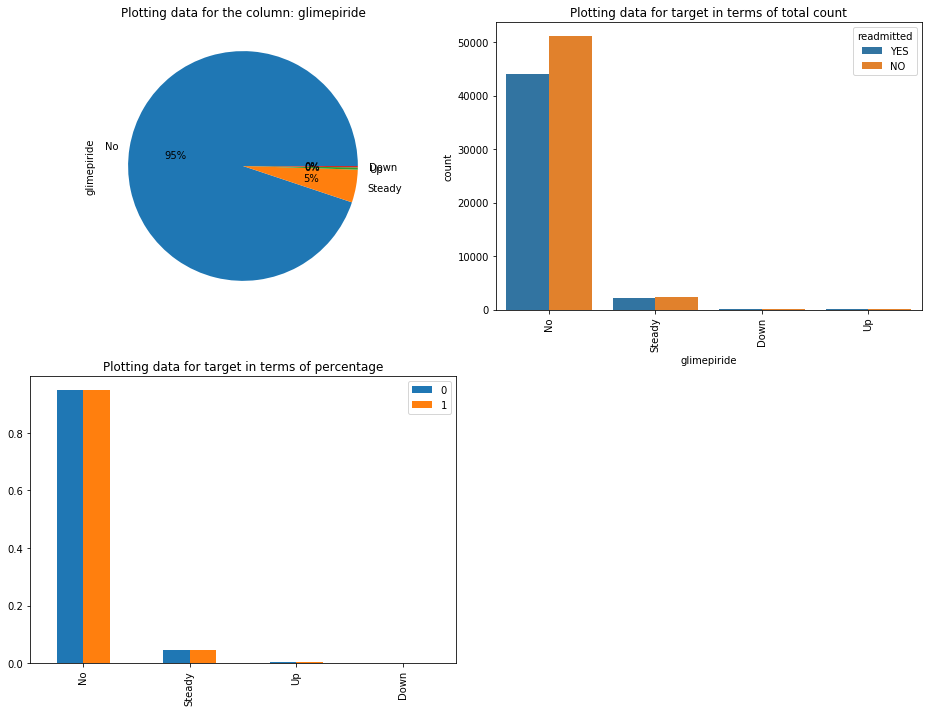

----------------------------------------------------------------------------------------------
Plotting acetohexamide


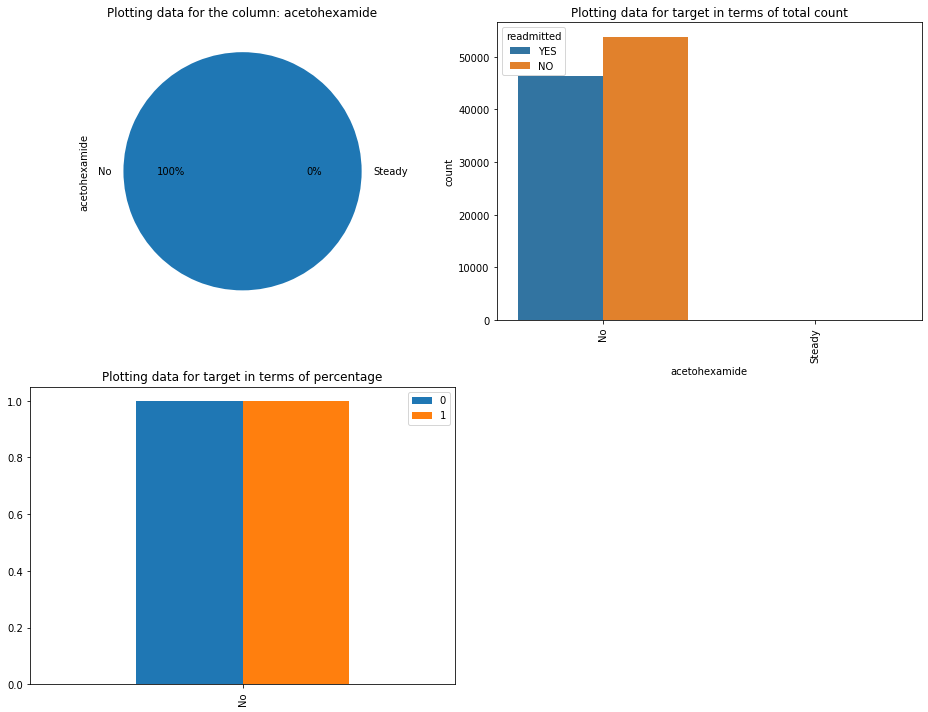

----------------------------------------------------------------------------------------------
Plotting glipizide


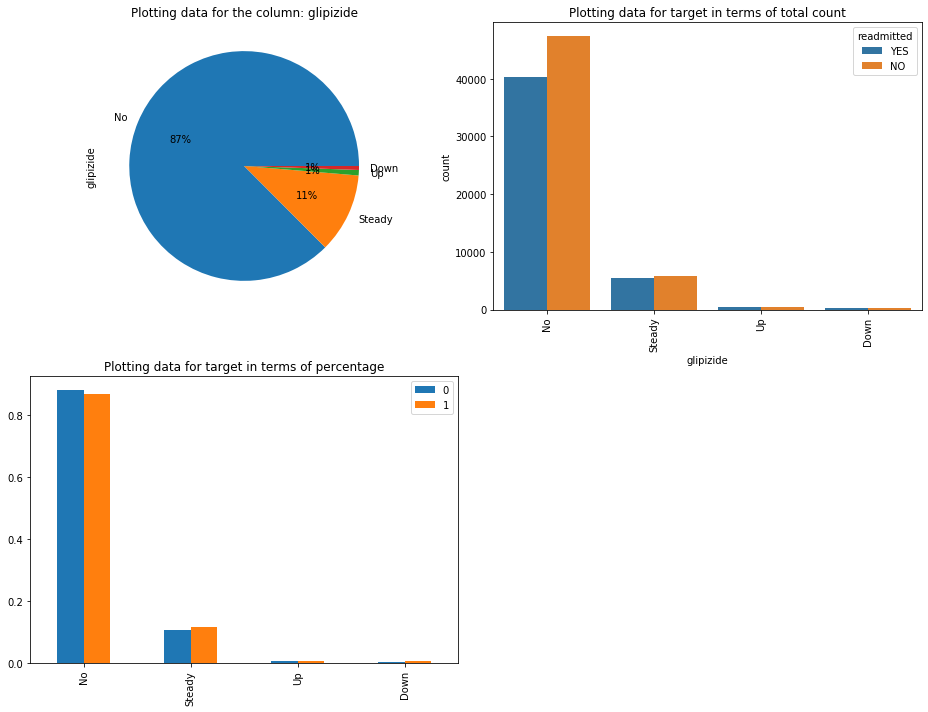

----------------------------------------------------------------------------------------------
Plotting glyburide


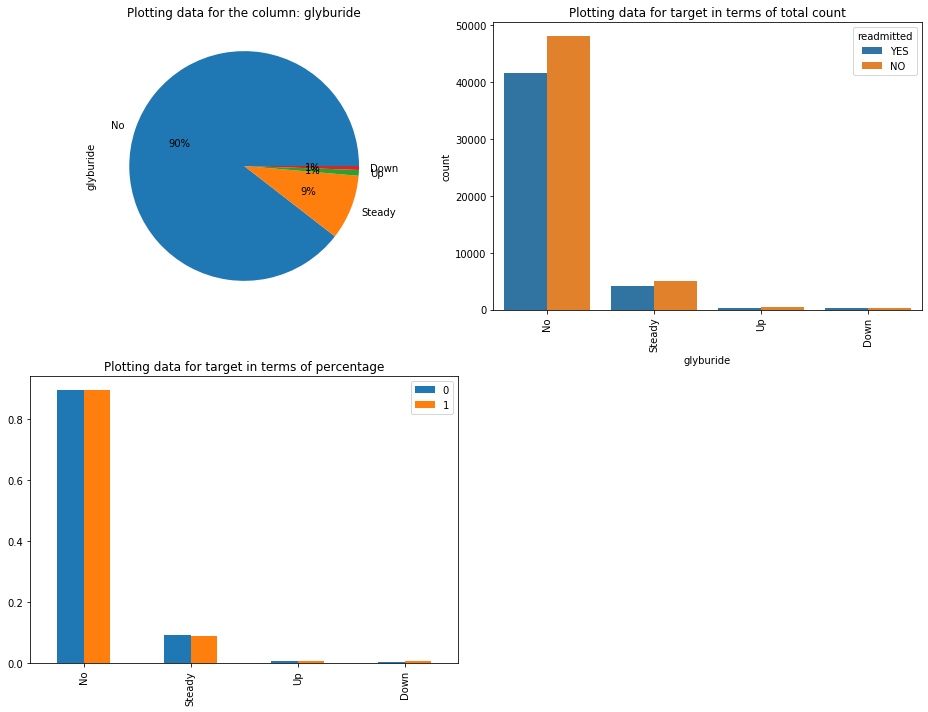

----------------------------------------------------------------------------------------------
Plotting tolbutamide


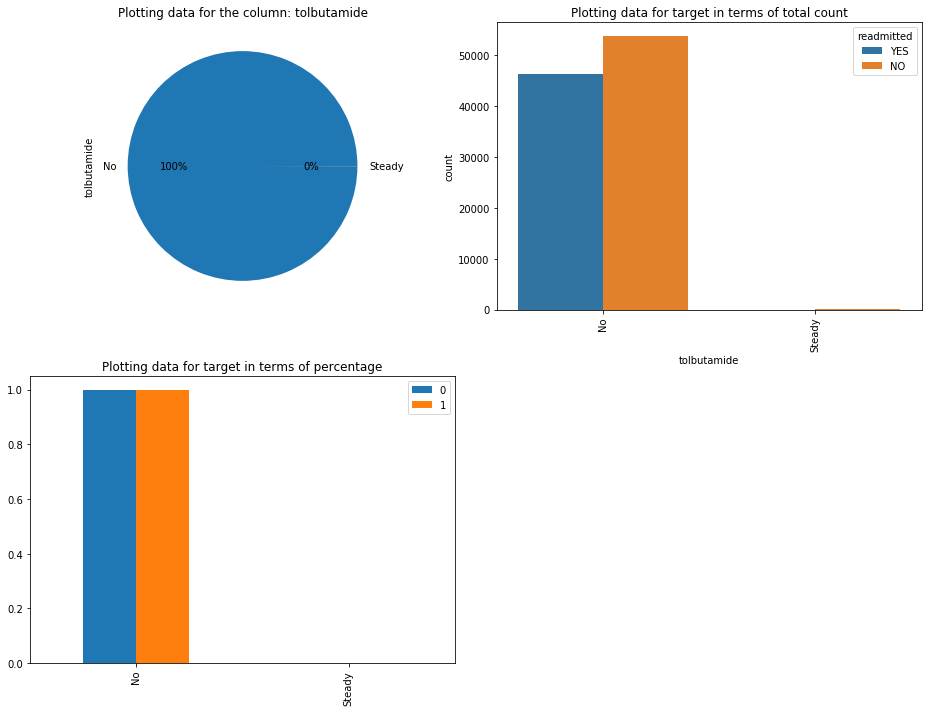

----------------------------------------------------------------------------------------------
Plotting pioglitazone


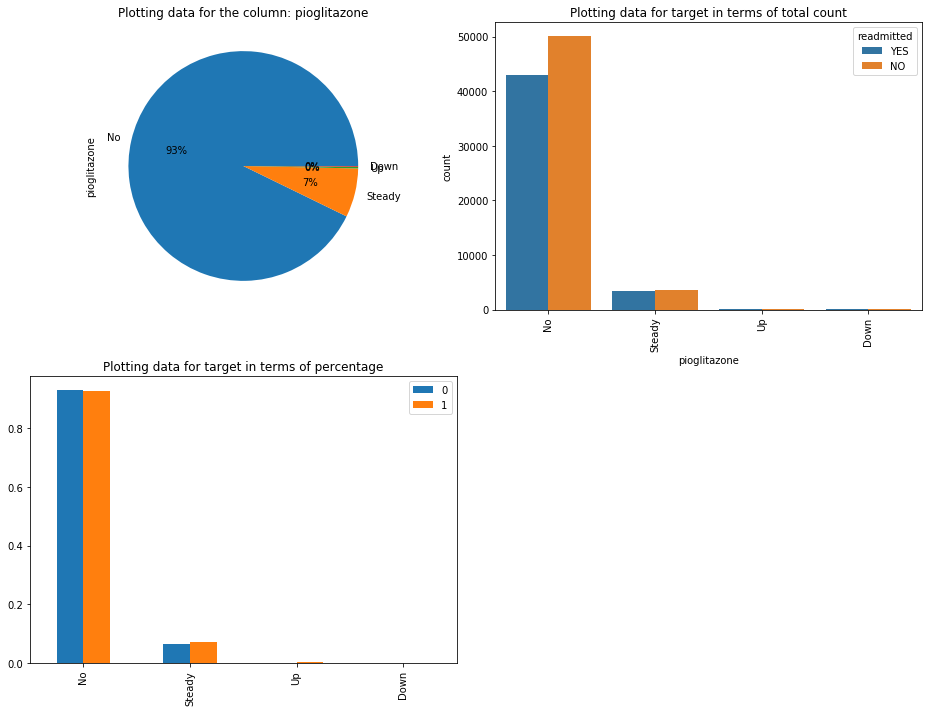

----------------------------------------------------------------------------------------------
Plotting rosiglitazone


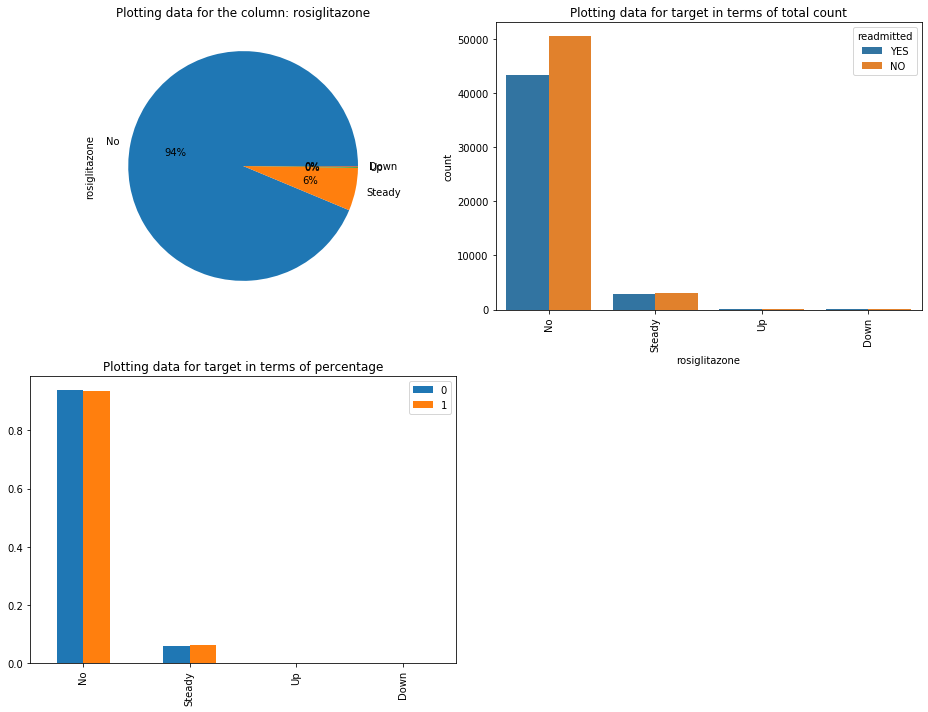

----------------------------------------------------------------------------------------------
Plotting acarbose


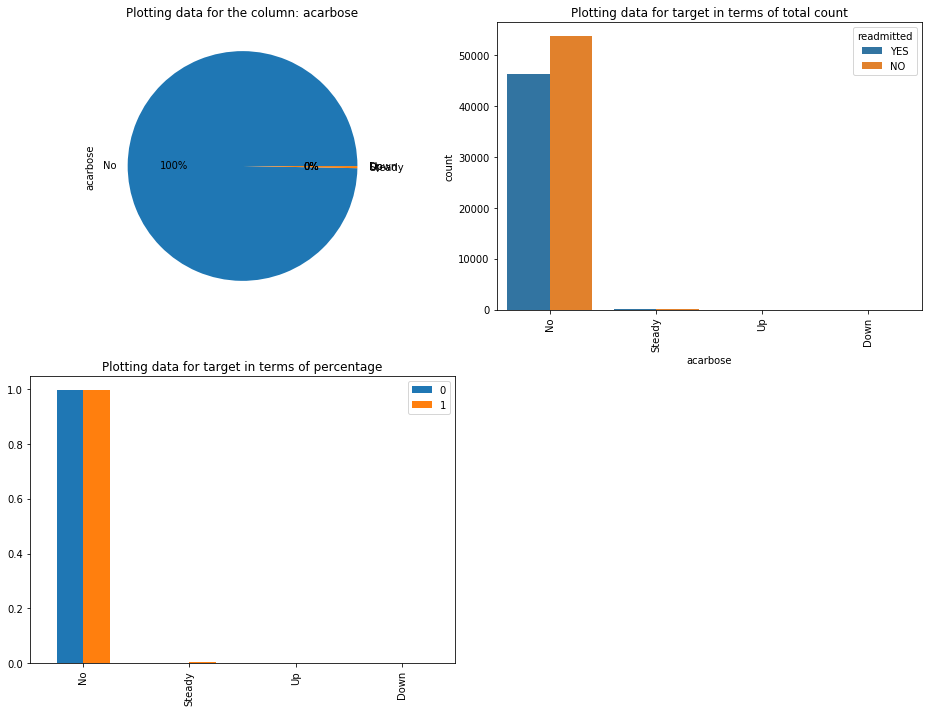

----------------------------------------------------------------------------------------------
Plotting miglitol


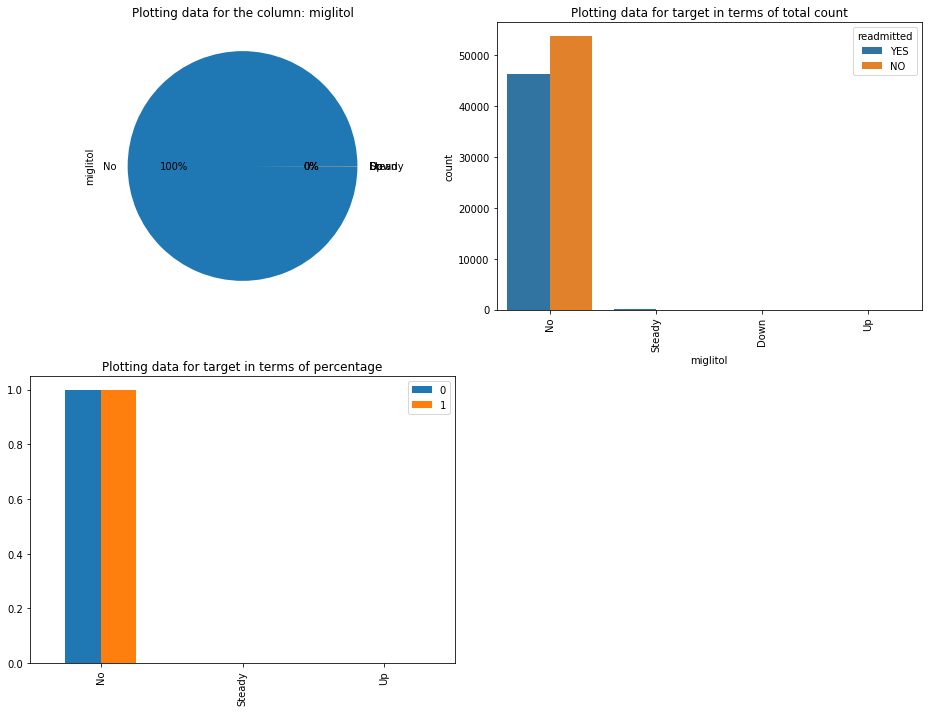

----------------------------------------------------------------------------------------------
Plotting troglitazone


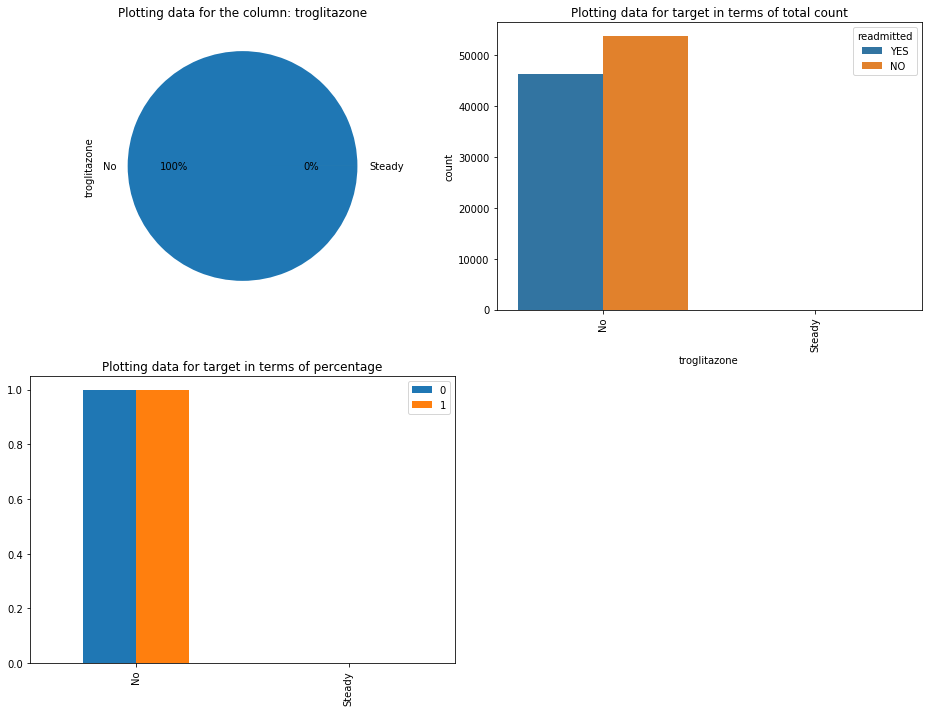

----------------------------------------------------------------------------------------------
Plotting tolazamide


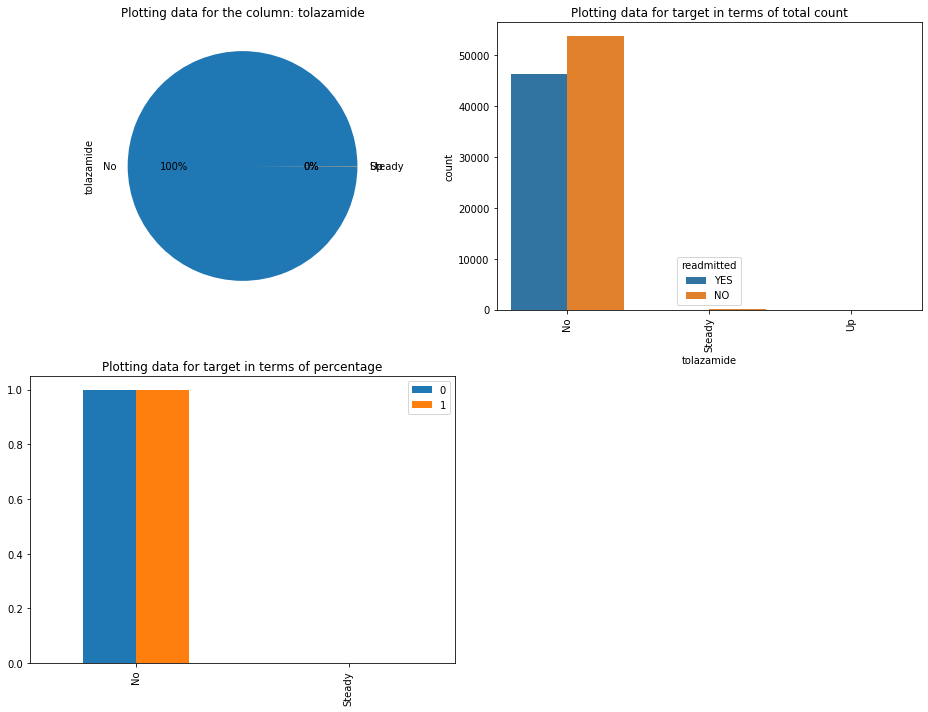

----------------------------------------------------------------------------------------------
Plotting examide


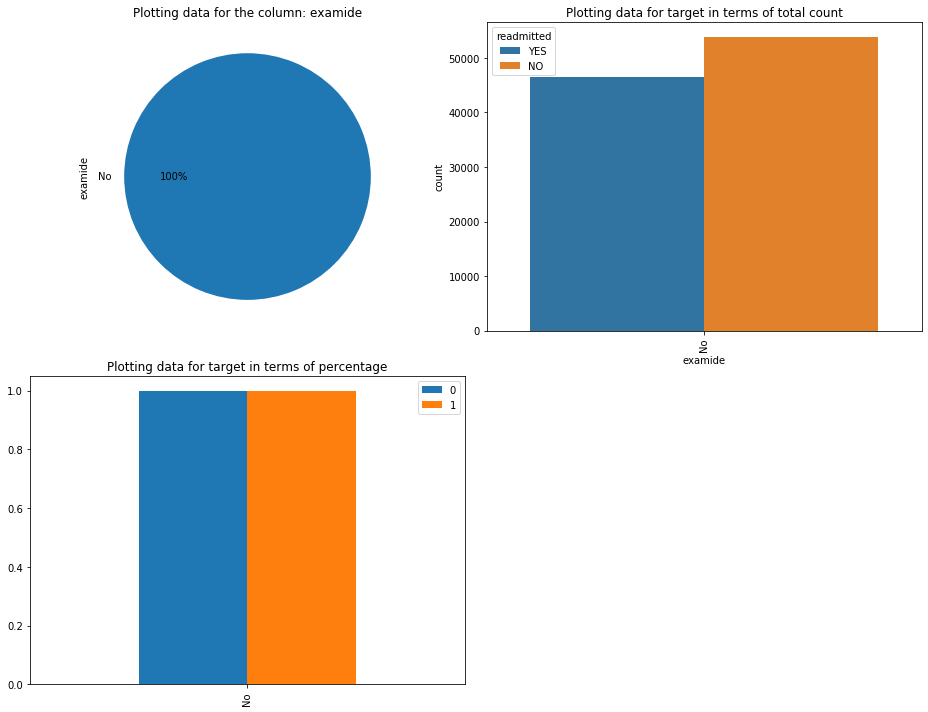

----------------------------------------------------------------------------------------------
Plotting insulin


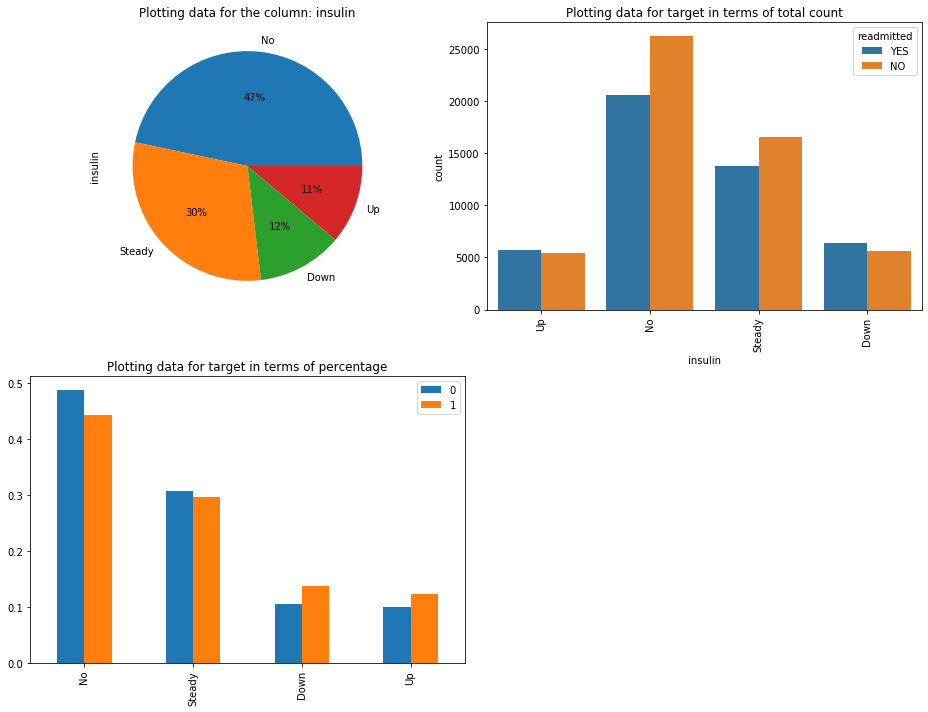

----------------------------------------------------------------------------------------------
Plotting glyburide-metformin


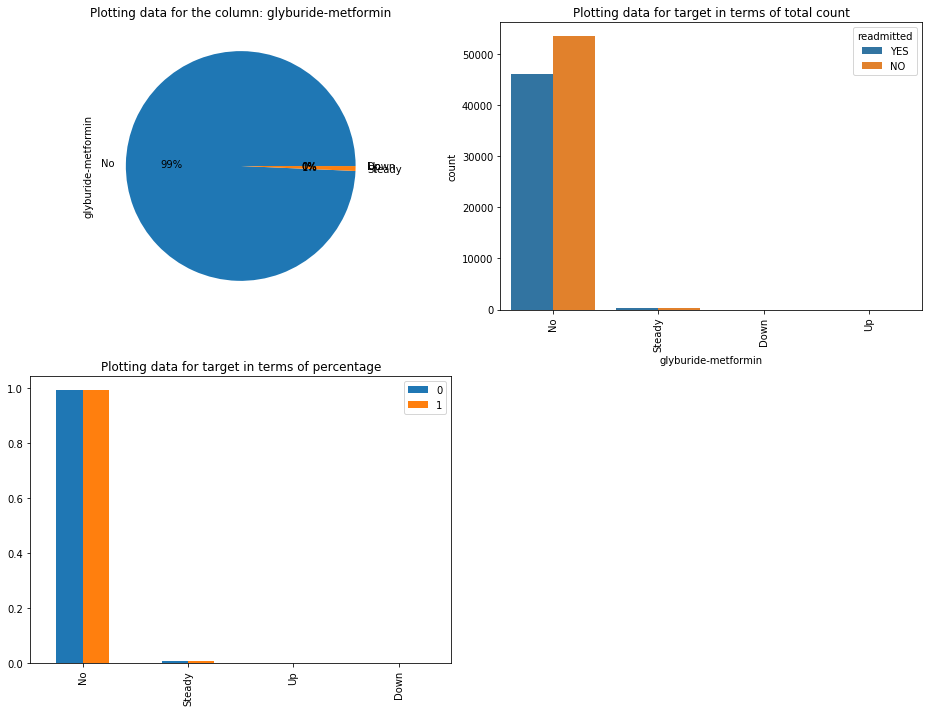

----------------------------------------------------------------------------------------------
Plotting glipizide-metformin


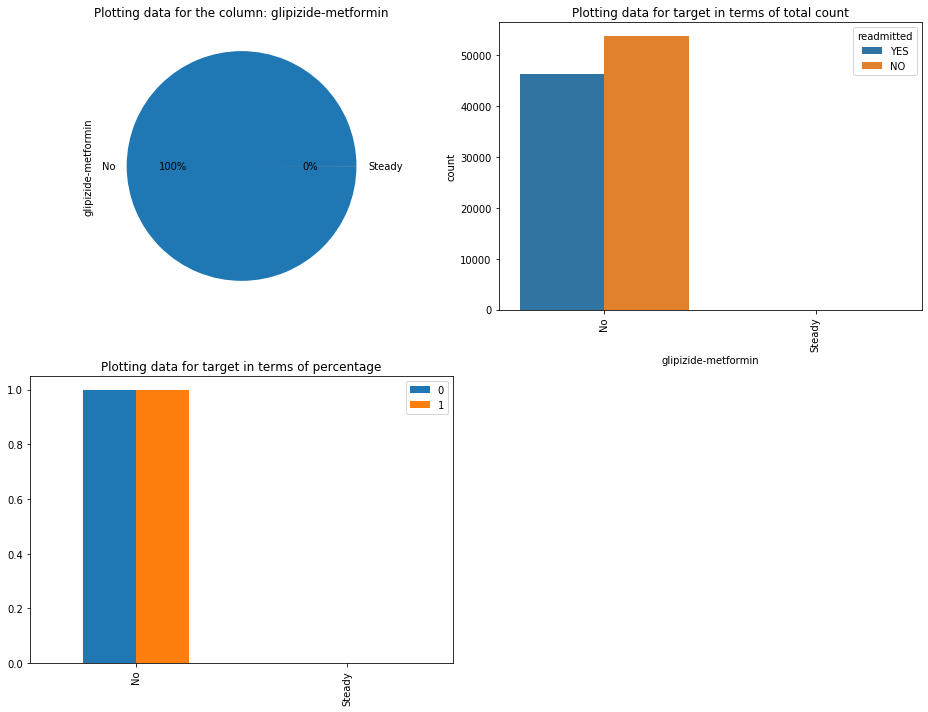

----------------------------------------------------------------------------------------------
Plotting glimepiride-pioglitazone


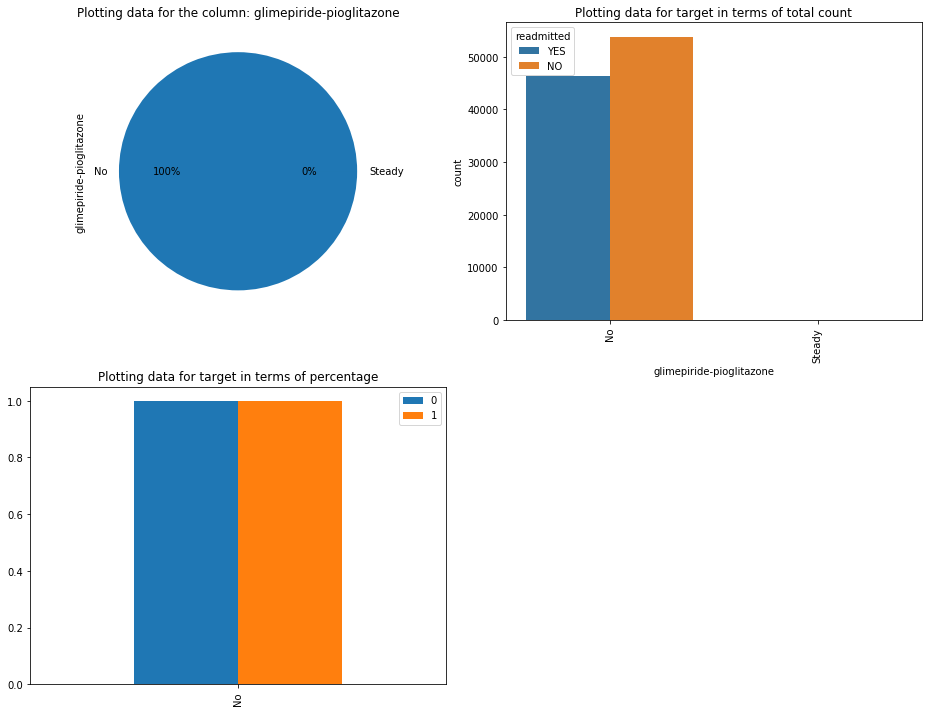

----------------------------------------------------------------------------------------------
Plotting metformin-rosiglitazone


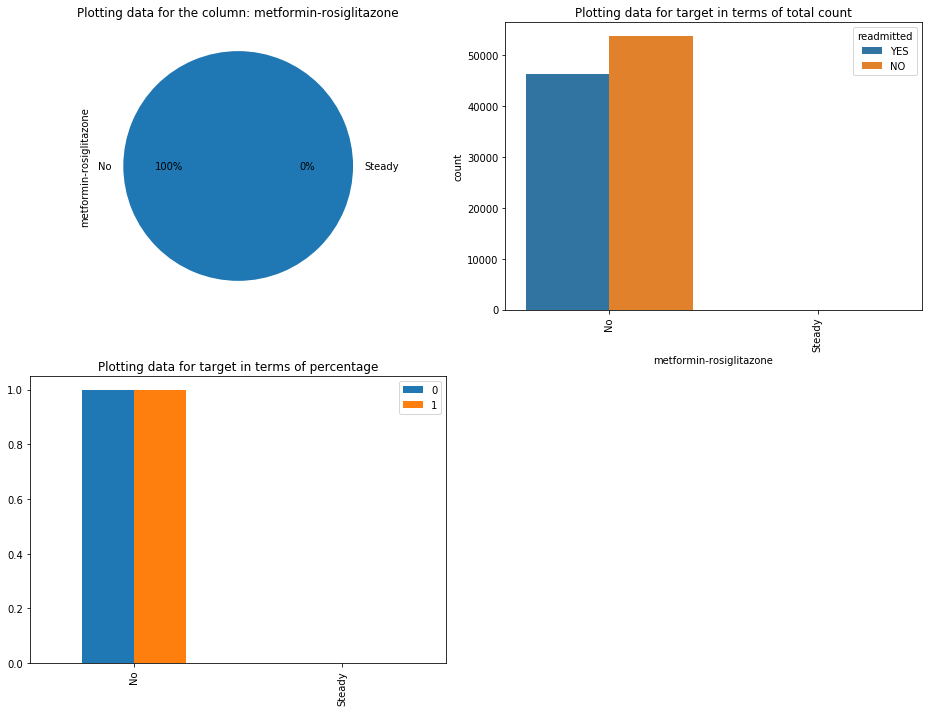

----------------------------------------------------------------------------------------------
Plotting metformin-pioglitazone


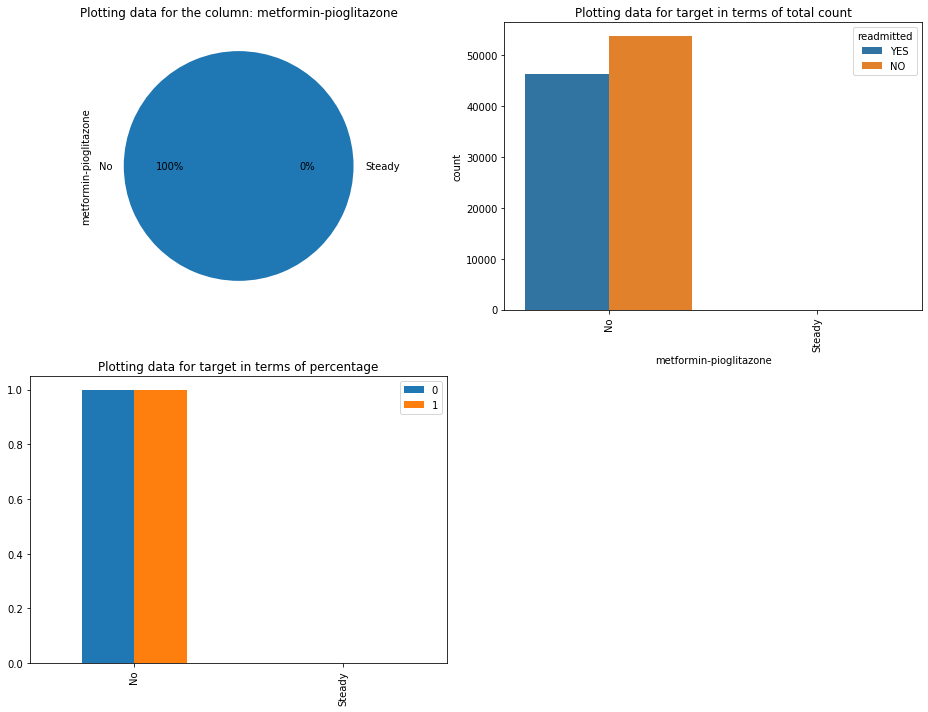

----------------------------------------------------------------------------------------------
Plotting change


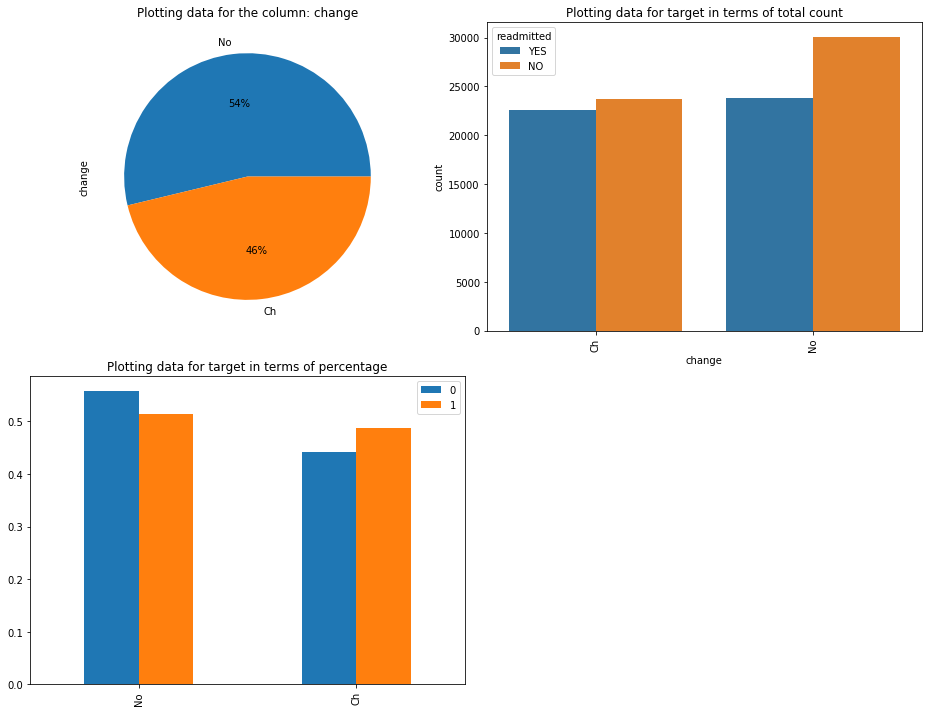

----------------------------------------------------------------------------------------------
Plotting diabetesMed


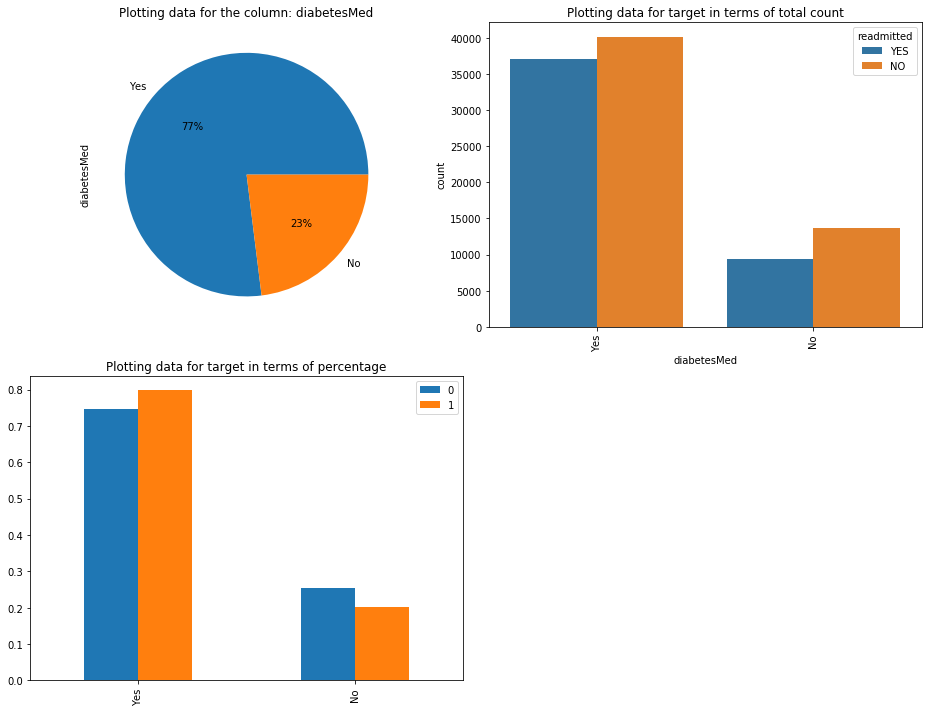

----------------------------------------------------------------------------------------------
Plotting Comorbidity


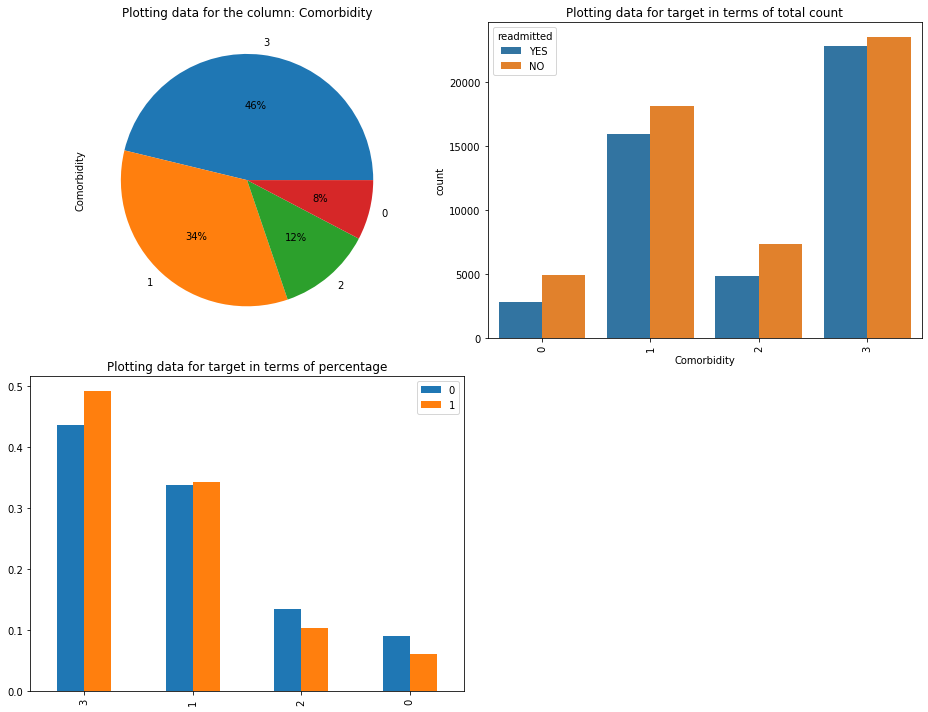

----------------------------------------------------------------------------------------------


In [56]:
for column in cols_1:
    print('Plotting', column)
    viz(data, data_0, data_1, column)
    print('----------------------------------------------------------------------------------------------')

### Inferences drawn from the above univariate categorical analysis are:

- Majority of the patients belong to Caucasian race followed by African-Americans. The least contribution is from people belonging to asian race. So, the payer can target the people beong to caucasian race and provide some tips to adapt healthy lifestyle.
- Among the Male, Female and Unknown Gender, the female population amount to around 54%, male population amount to around 46% and the unknown gender identity patients are amounting to less than 0.01%. So, the payer can target female population and introduce some programs or incentives to improve self-care and health awareness among them.
- The patients in the age group of 70-80 were having the highest count of readmission followed by the pateints in the age groups of 60-70, 50-60 and 80-90. The Patient count visiting the hospital without getting admitted was also following the same order. So, the payer should concentrate on the health of older population rather than the younger populations and provide awareness among them.
- From the data, it is clear that 72% of the patients have a payer code of 'MC' which might indicate the 'Medicare' payment. Medicare is a Government-sponsored health insurance which provides coverage to people who are more than 65 years old or people who have a disability. So, the payer should concentrate again on the older population and the specially abled population as they might need some extra care than an ordinary individual.
- 95% of the patients have the value 'None' in their max_glu_serum column (which indicates glucose serum test result. Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured). This means that the test was not done.
- Similarly for the A1Cresult (Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured). This is another test performed to measure what percentage of the hemoglobin is coated with sugar (glycated). Higher the A1C level, poorer the blood sugar control and higher the risk of diabetes complications. For 83% of the patients, the test was not done and in the remaining 17%, 5% has normal values and the rest have abnormal values (>7 and >8). So, the payer can provide some incentives and communications through text messages to keep this value under control to control diabetes.
- Among all the diabetes medications in our data, most widely used ones are insulin (53%) followed by metformin (20%). So, the payer can target those people who are on these medications and monitor their health closely.
- Based on our data, 77% of the patients are taking diabetes medications. So, there is a high risk of these people getting admitted and readmitted to the hospitals. So, the payer can extend their programs and incentives to closely monitor their and prevent them readmitting.
- Only 8% of the total population donot have any comorbidity.
- 46% of the population has both comorbidities - 'Diabetes', 'Circulatory disease'. Payer can work on this chunk of population to reduce their health risk.
- Remaining 46% has any one of the comorbidities.

### Bivariate analysis of categorical columns.

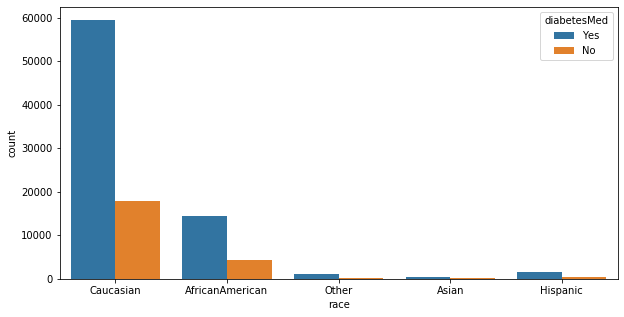

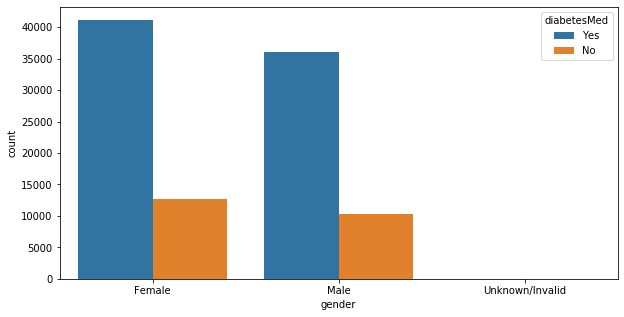

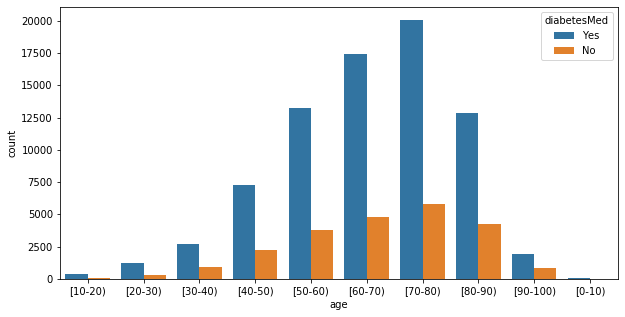

In [57]:
# Analysing the few categorical columns 'race', 'gender', 'age' against 'diabetesMed'.

cols_2 = ['race', 'gender', 'age']

for i in cols_2:
    
    plt.figure(figsize = (10,5))

    sns.countplot(x = i, hue = 'diabetesMed', data = data)
    plt.show()

### Inferences drawn from the above bivariate categorical analysis are:

- Among the different races, people belonging to caucasian race are more prone to diabetes.
- Among male and female, female population are slightly more prone to diabetes than males.
- Though there are some cases where population belonging to the age groups 0-10, 10-20 and 20-30 using diabetes medications, the count is very low. The progression of the disease started from the age group 30-40 and showed an increasing trend up to the age group of 70-80. The payer can concentrate the people in  their 30s and constantly monitor for diabetes in them to prevent them from becoming diabetic at every stage. For the rest, the payer should make sure that the disease progression is in control.

### Univariate analysis of numerical columns.

In [58]:
num_cols

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [59]:
cols_3 = num_cols.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
cols_3

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [60]:
data[cols_3].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000
mean,4.420275,43.173716,1.350275,16.117823,0.372561,0.199014,0.639470,7.497007
std,2.991273,19.691484,1.710913,8.116424,1.274074,0.933541,1.262773,1.839537
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Plotting  time_in_hospital


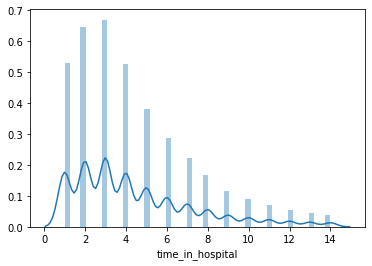

----------------------------------------------------------------------------------------------
Plotting  num_lab_procedures


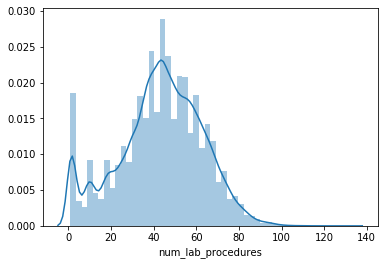

----------------------------------------------------------------------------------------------
Plotting  num_procedures


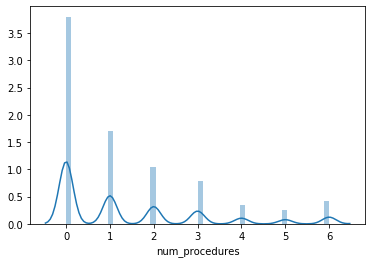

----------------------------------------------------------------------------------------------
Plotting  num_medications


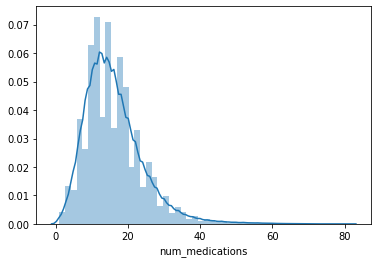

----------------------------------------------------------------------------------------------
Plotting  number_outpatient


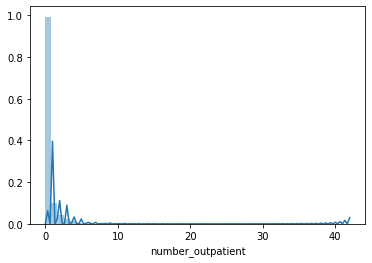

----------------------------------------------------------------------------------------------
Plotting  number_emergency


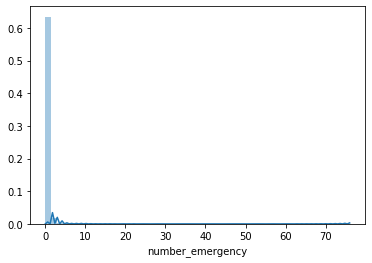

----------------------------------------------------------------------------------------------
Plotting  number_inpatient


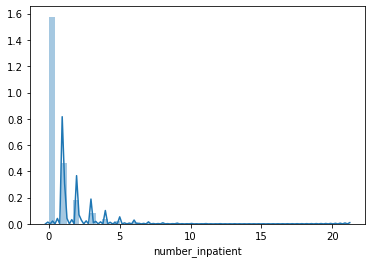

----------------------------------------------------------------------------------------------
Plotting  number_diagnoses


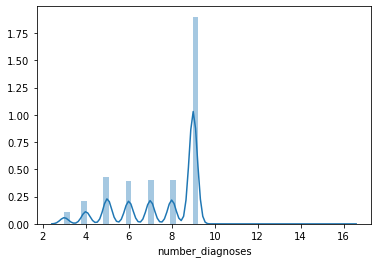

----------------------------------------------------------------------------------------------


In [61]:
# Analysing the numerical columns using distplots.

for i in cols_3:
    print("Plotting ", i)
    sns.distplot(data[i])
    plt.show()
    print('----------------------------------------------------------------------------------------------')

### Inferences drawn from the above univariate numerical analysis are:

- Maximum time a patient stayed in hospital was 14 days and the minimum was 1 day. Majority stay was between 1-6 days.
- Maximum number of lab procedures performed during an encounter was 132 and the minimum count was 1. On an average, 40-60 procedures are being performed in an encounter.
- Number of procedures (other than lab tests) performed during the encounter are mostly 0 or 1 and are ranging between 0-6.
- Number of distinct generic medications administered during the encounter is varying between 1-81. Of which majority of them are lying in the range of 10-20 medications.
- Number of outpatient visits of the patient in the year preceding the encounter are in the range 0-42. This indicates that majority of the patients are having their first visit to the hospital.
- Number of emergency visits of the patient in the year preceding the encounter lies in the range of 0-76. Also here, majority of the patients didn't have any emergency visit prior to the current year to this hospital.
- Number of inpatient visits of the patient in the year preceding the encounter lies in the range of 0-21. Majority is 0 i.e no patient is admitted as in-patient in the year preceeding.
- Number of diagnoses entered to the system are in the range 3-16. On an average, 9 diagnoses are being entered into the system in an encounter for a patient.

### Bivariate analysis of numerical columns.

Plotting  time_in_hospital


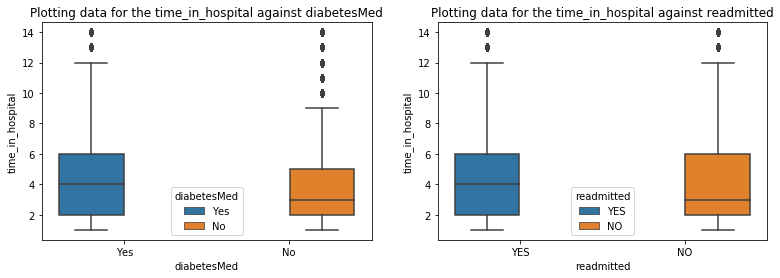

----------------------------------------------------------------------------------------------
Plotting  num_medications


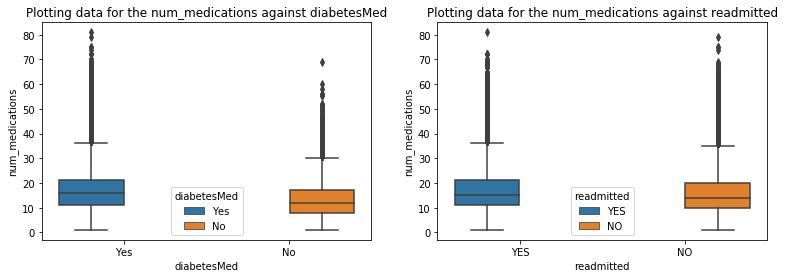

----------------------------------------------------------------------------------------------
Plotting  number_outpatient


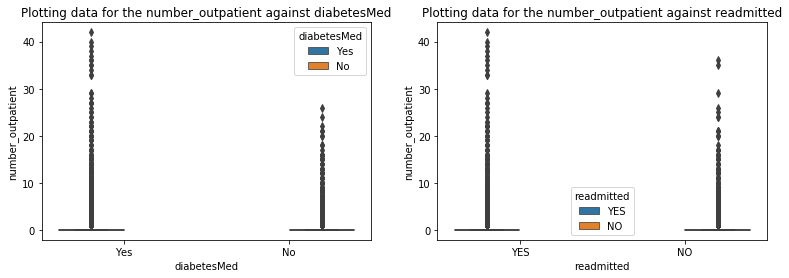

----------------------------------------------------------------------------------------------
Plotting  number_emergency


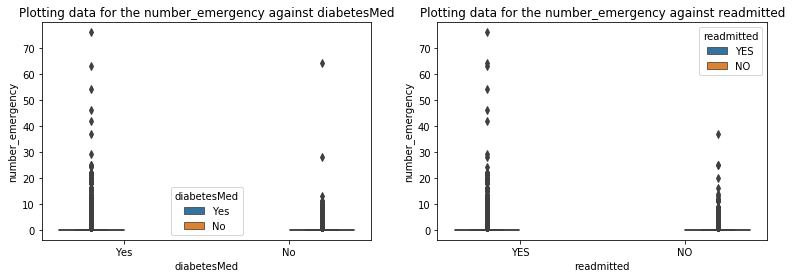

----------------------------------------------------------------------------------------------
Plotting  number_inpatient


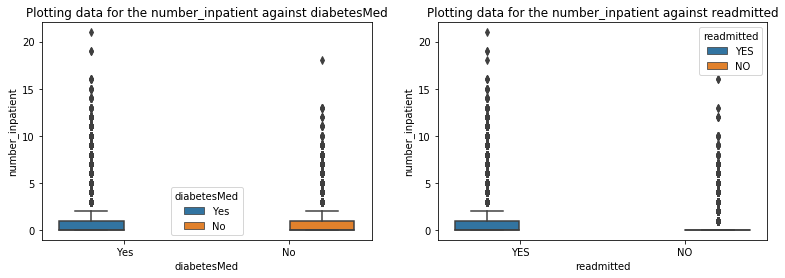

----------------------------------------------------------------------------------------------


In [62]:
# Analysing the few numerical columns against 'diabetesMed' and 'readmitted'.

cols_4 = ['time_in_hospital', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

for i in cols_4:
    
    fig = plt.figure(figsize = (13,4))
    
    print("Plotting ", i)
    
    plt.subplot(121)
    sns.boxplot(x = 'diabetesMed', y = i, hue = 'diabetesMed', data = data)
    plt.title('Plotting data for the ' + i + ' against diabetesMed')
    
    plt.subplot(122)
    sns.boxplot(x = 'readmitted', y = i, hue = 'readmitted', data = data)
    plt.title('Plotting data for the ' + i + ' against readmitted')
    
    
    plt.show()
    print('----------------------------------------------------------------------------------------------')

### Inferences drawn from the above bivariate numerical analysis are:

- Patients who are on diabetes medications are likely to stay for longer time in hospital when compared with those who are not on diabetes medications. Also its the same for the variable readmitted.
- People taking diabetes meds are also taking more number of other medications when compared with that of those not taking diabetes meds. This in turn is in sync with the number of patients getting readmitted.
- The spread of number of out-patients visiting the hospital is more in case of the people taking dabetes medications.
- Emergency visits are also more in case of the people taking diabetes medications.
- Number of in-patients and number of in-patients getting readmitted is more in case of those taking diabetes meds. 

# Creating Dummies

In [63]:
# Creating dummies for categorical columns.
# Dropping the columns 'encounter_id' and 'patient_nbr' as these are not useful for our model building.
# Also dropping the columns 'diag_1', 'diag_2' and 'diag_3' as these codes will not be useful in our analysis.

data_1 = data.drop(['encounter_id', 'patient_nbr', 'diag_1', 'diag_2', 'diag_3'], axis = 1)

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100244 entries, 0 to 100243
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      100244 non-null  object
 1   gender                    100244 non-null  object
 2   age                       100244 non-null  object
 3   admission_type_id         100244 non-null  int64 
 4   discharge_disposition_id  100244 non-null  int64 
 5   admission_source_id       100244 non-null  int64 
 6   time_in_hospital          100244 non-null  int64 
 7   payer_code                100244 non-null  object
 8   num_lab_procedures        100244 non-null  int64 
 9   num_procedures            100244 non-null  int64 
 10  num_medications           100244 non-null  int64 
 11  number_outpatient         100244 non-null  int64 
 12  number_emergency          100244 non-null  int64 
 13  number_inpatient          100244 non-null  int64 
 14  numb

In [64]:
cols_5 = data_1.select_dtypes(include = ['object']).columns

cols_5 = cols_5.drop(['readmitted'])

data_1 = pd.get_dummies(data = data_1, columns = cols_5)

In [65]:
data_1.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Comorbidity_0,Comorbidity_1,Comorbidity_2,Comorbidity_3
0,1,1,7,3,59,0,18,0,0,0,9,YES,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
1,1,1,7,2,11,5,13,2,0,1,6,NO,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1,1,7,2,44,1,16,0,0,0,7,NO,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
3,1,1,7,1,51,0,8,0,0,0,5,NO,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
4,2,1,2,3,31,6,16,0,0,0,9,YES,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [66]:
data_1.shape

(100244, 133)

In [67]:
# Converting the target column into binary '0' & '1'

data_1.readmitted[data.readmitted == 'YES'] = 1
data_1.readmitted[data.readmitted == 'NO'] = 0

data_1['readmitted'] = data_1['readmitted'].astype('int64')

In [68]:
data_1.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Comorbidity_0,Comorbidity_1,Comorbidity_2,Comorbidity_3
0,1,1,7,3,59,0,18,0,0,0,9,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
1,1,1,7,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1,1,7,2,44,1,16,0,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
3,1,1,7,1,51,0,8,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
4,2,1,2,3,31,6,16,0,0,0,9,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


# Dividing the data into Train and Test sets

In [69]:
# Splitting the data into train and test
# Setting the seed value to a constant so that we get the same output always 

from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_1, train_size = 0.7, random_state = 100)

In [70]:
# Lets check the shape of train and test data 

print(data_train.shape)
print(data_test.shape)

(70170, 133)
(30074, 133)


# Scaling the data

In [71]:
cols_6 = data_1.select_dtypes(include = ['int64']).columns

cols_6 = cols_6.drop(['readmitted'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train[cols_6] = scaler.fit_transform(data_train[cols_6])

data_train.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Comorbidity_0,Comorbidity_1,Comorbidity_2,Comorbidity_3
83957,0.674442,-0.516279,-1.170544,-1.144160,-2.135912,0.380566,-0.262790,-0.293383,-0.21673,0.285869,0.271517,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
3032,-0.707549,-0.516279,0.308657,-0.474786,1.157078,-0.788855,-1.128721,-0.293383,-0.21673,0.285869,-2.447369,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
25448,2.056432,1.946000,2.773993,1.198649,-1.072023,-0.788855,-0.139086,-0.293383,-0.21673,-0.504183,0.815294,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0
84293,0.674442,0.430751,-1.170544,-0.474786,-1.527975,-0.204145,0.850549,-0.293383,-0.21673,-0.504183,-1.359815,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
50088,0.674442,3.461249,-1.170544,-0.140099,-0.210779,0.965277,2.211297,-0.293383,-0.21673,-0.504183,0.815294,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1


In [72]:
data_test[cols_6] = scaler.transform(data_test[cols_6])

data_test.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Comorbidity_0,Comorbidity_1,Comorbidity_2,Comorbidity_3
100098,0.674442,-0.137467,-1.170544,-0.140099,-1.831943,-0.204145,2.458705,-0.293383,-0.21673,-0.504183,0.271517,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
58856,-0.707549,0.430751,0.308657,-0.809473,0.447819,0.380566,-0.881312,-0.293383,-0.21673,1.075921,0.271517,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0
112,-0.707549,-0.137467,0.308657,3.206771,1.765014,-0.204145,0.355732,-0.293383,-0.21673,-0.504183,0.271517,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
46386,-0.707549,-0.516279,0.308657,-0.474786,-0.717393,0.965277,0.108323,-0.293383,-0.21673,-0.504183,0.815294,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0
38112,-0.016554,-0.516279,0.308657,0.529275,-1.933266,-0.788855,-0.881312,-0.293383,-0.21673,0.285869,-0.272261,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


# Dividing into X and Y sets for the model building

In [73]:
X_train = data_train.drop(['readmitted'], axis = 1)
y_train = data_train['readmitted']
X_test = data_test.drop(['readmitted'], axis = 1)
y_test = data_test['readmitted']

# Model building

## Logistic regression

### Model I

In [74]:
from sklearn.linear_model import LogisticRegression

lg_1 = LogisticRegression(random_state = 100)

In [75]:
# Importing RFE from sklearn

from sklearn.feature_selection import RFE

rfe = RFE(lg_1, 30)

rfe = rfe.fit(X_train, y_train)

In [76]:
# '.support_' gives an array of boolean values of which, True indicates that those columns are selected after applyng RFE 

rfe.support_

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False,

In [77]:
# Obtaining list of all the variables with boolean and ranking beside
# Those with 'True' are the variables selected using RFE
# '.ranking_' assigns rank to each variable

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('admission_type_id', False, 64),
 ('discharge_disposition_id', False, 50),
 ('admission_source_id', False, 73),
 ('time_in_hospital', False, 53),
 ('num_lab_procedures', False, 67),
 ('num_procedures', False, 34),
 ('num_medications', False, 98),
 ('number_outpatient', False, 19),
 ('number_emergency', True, 1),
 ('number_inpatient', True, 1),
 ('number_diagnoses', True, 1),
 ('race_AfricanAmerican', True, 1),
 ('race_Asian', False, 11),
 ('race_Caucasian', True, 1),
 ('race_Hispanic', False, 100),
 ('race_Other', False, 12),
 ('gender_Female', False, 46),
 ('gender_Male', False, 71),
 ('gender_Unknown/Invalid', False, 102),
 ('age_[0-10)', True, 1),
 ('age_[10-20)', False, 21),
 ('age_[20-30)', False, 74),
 ('age_[30-40)', False, 88),
 ('age_[40-50)', False, 25),
 ('age_[50-60)', False, 26),
 ('age_[60-70)', False, 23),
 ('age_[70-80)', False, 22),
 ('age_[80-90)', False, 24),
 ('age_[90-100)', True, 1),
 ('payer_code_BC', True, 1),
 ('payer_code_CH', True, 1),
 ('payer_code_CM', Fa

In [78]:
# Pulling out the variables with boolean 'True' and assigning them to a variable

Features = X_train.columns[rfe.support_]
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Caucasian', 'age_[0-10)', 'age_[90-100)',
       'payer_code_BC', 'payer_code_CH', 'payer_code_MP', 'payer_code_PO',
       'payer_code_SP', 'payer_code_WC', 'max_glu_serum_>300',
       'repaglinide_Steady', 'chlorpropamide_Up', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_No',
       'acarbose_Up', 'miglitol_Down', 'miglitol_No', 'miglitol_Steady',
       'glipizide-metformin_No', 'glipizide-metformin_Steady',
       'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

In [79]:
# Assessing the model with StatsModels
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept 
# Hence, we need to use the command 'add_constant' so that it also fits an intercept

import statsmodels.api as sm

X_train_sm_1 = sm.add_constant(X_train[Features])

lg_1 = sm.GLM(y_train, X_train_sm_1, family = sm.families.Binomial())

Model_1 = lg_1.fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70141
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Oct 2020   Deviance:                          nan
Time:                        19:09:52   Pearson chi2:                 1.43e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -6.324e+25   3.41e+18  -1.85e+07      0.000   -6.32e+25   -6.32e+25
number_emergency            1.241e+14   2.65e+05   4.69e+08      0.000    1.24e+14    1.24e+14
number_inpatient            2.077e+14   2.66e+05   7.81e+08      0.000    2.08e+14    2.08e+14
number_diagnoses            9.702e+14   2.57e+05   3.78e+09      0.000     9.7e+14     9.7e+14
race_AfricanAmerican        1.652e+14   1.39e+06   1.19e+08      0.000    1.65e+14    1.65e+14
race_Caucasian              2.096e+14   1.29e+06   1.63e+08      0.000     2.1e+14     2.1e+14
age_[0-10)                  1.396e+15   9.91e+06   1.41e+08      0.000     1.4e+15     1.4e+15
age_[90-100)               -2.881e+14   1.55e+06  -1.86e+08      0.000   -2.88e+14   -2.88e+14
payer_code_BC              -1.998e+14   1.23e+06  -1.63e+08      0.000      -2e+14      -2e+14
payer_code_CH              -1.026e+15   6.46e+06  -1.59e+08      0.000   -1.03e+15   -1.03e+15
payer_code_MP              -4.417e+13   9.05e+06  -4.88e+06      0.000   -4.42e+13   -4.42e+13
payer_code_PO              -4.324e+14   3.32e+06   -1.3e+08      0.000   -4.32e+14   -4.32e+14
payer_code_SP               1.777e+14   1.19e+06    1.5e+08      0.000    1.78e+14    1.78e+14
payer_code_WC              -7.244e+14   7.29e+06  -9.94e+07      0.000   -7.24e+14   -7.24e+14
max_glu_serum_>300          1.516e+14    2.3e+06   6.61e+07      0.000    1.52e+14    1.52e+14
repaglinide_Steady          9.564e+12   2.19e+06   4.37e+06      0.000    9.56e+12    9.56e+12
chlorpropamide_Up           3.147e+14   3.36e+07   9.38e+06      0.000    3.15e+14    3.15e+14
glipizide_Down              7.372e+13   3.35e+06    2.2e+07      0.000    7.37e+13    7.37e+13
glipizide_Up                1.129e+14   2.97e+06   3.81e+07      0.000    1.13e+14    1.13e+14
pioglitazone_Up             1.516e+14   5.17e+06   2.93e+07      0.000    1.52e+14    1.52e+14
rosiglitazone_Down         -7.842e+14   8.39e+06  -9.34e+07      0.000   -7.84e+14   -7.84e+14
acarbose_No                -2.043e+14   4.72e+06  -4.33e+07      0.000   -2.04e+14   -2.04e+14
acarbose_Up                 1.029e+15   2.58e+07   3.99e+07      0.000    1.03e+15    1.03e+15
miglitol_Down                2.53e+25   1.37e+18   1.85e+07      0.000    2.53e+25    2.53e+25
miglitol_No                  2.53e+25   1.37e+18   1.85e+07      0.000    2.53e+25    2.53e+25
miglitol_Steady              2.53e+25   1.37e+18   1.85e+07      0.000    2.53e+25    2.53e+25
glipizide-metformin_No      3.794e+25   2.05e+18   1.85e+07      0.000    3.79e+25    3.79e+25
glipizide-metformin_Steady  3.794e+25   2.05e+18   1.85e+07      0.000    3.79e+25    3.79e+25
diabetesMed_No              4.039e+13   1.45e+06   2.78e+07      0.000    4.04e+13    4.04e+13
Comorbidity_1               2.695e+14   1.5

In [80]:
# Getting the predicted y-values on the train set
# Looking at the first ten values

y_train_pred_1 = Model_1.predict(X_train_sm_1)
y_train_pred_1[:10]

83957    1.0
3032     0.0
25448    1.0
84293    0.0
50088    1.0
68376    1.0
67131    1.0
22120    0.0
85775    1.0
22802    1.0
dtype: float64

In [81]:
# Reshaping the data
# Numpy allow us to give one of new shape parameter as -1. 
# It simply means that it is an unknown dimension and we want numpy to figure it out.

y_train_pred_1 = y_train_pred_1.values.reshape(-1)
y_train_pred_1[:10]

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 1.])

In [82]:
# Creating a dataframe with the actual converted and the predicted converted probabilities

Prob_1 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_1})

Prob_1['Record'] = y_train.index

Prob_1.head()

,Readmitted,Predicted_prob,Record
0,0,1.0,83957
1,0,0.0,3032
2,0,1.0,25448
3,0,0.0,84293
4,0,1.0,50088


In [83]:
# Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'

Prob_1['Predicted'] = Prob_1.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_1.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,1.0,83957,1
1,0,0.0,3032,0
2,0,1.0,25448,1
3,0,0.0,84293,0
4,0,1.0,50088,1


### VIF(Variance Inflation Factor)

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our model. We generally want a VIF that is less than 5.

In [84]:
# Importing VIF from statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_1 = pd.DataFrame()

VIF_1['Variables'] = X_train[Features].columns

VIF_1['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_1['VIF'] = round(VIF_1['VIF'], 2)

VIF_1 = VIF_1.sort_values(by = "VIF", ascending = False)

VIF_1

,Variables,VIF
26,glipizide-metformin_Steady,inf
25,glipizide-metformin_No,inf
24,miglitol_Steady,inf
23,miglitol_No,inf
22,miglitol_Down,inf
29,Comorbidity_3,9.50
28,Comorbidity_1,8.45
27,diabetesMed_No,5.81
3,race_AfricanAmerican,4.57
4,race_Caucasian,4.57


In [85]:
# Dropping the variable 'glipizide-metformin_Steady'

Features = Features.drop('glipizide-metformin_Steady', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Caucasian', 'age_[0-10)', 'age_[90-100)',
       'payer_code_BC', 'payer_code_CH', 'payer_code_MP', 'payer_code_PO',
       'payer_code_SP', 'payer_code_WC', 'max_glu_serum_>300',
       'repaglinide_Steady', 'chlorpropamide_Up', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_No',
       'acarbose_Up', 'miglitol_Down', 'miglitol_No', 'miglitol_Steady',
       'glipizide-metformin_No', 'diabetesMed_No', 'Comorbidity_1',
       'Comorbidity_3'],
      dtype='object')

### Model II

In [86]:
# Let's build second model after dropping 'glipizide-metformin_Steady'

X_train_sm_2 = sm.add_constant(X_train[Features])

lg_2 = sm.GLM(y_train, X_train_sm_2, family = sm.families.Binomial())

Model_2 = lg_2.fit()

Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70141
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Oct 2020   Deviance:                          nan
Time:                        19:10:20   Pearson chi2:                 1.43e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -6.38e+25   3.42e+18  -1.86e+07      0.000   -6.38e+25   -6.38e+25
number_emergency        1.316e+14   2.65e+05   4.97e+08      0.000    1.32e+14    1.32e+14
number_inpatient        2.116e+14   2.66e+05   7.96e+08      0.000    2.12e+14    2.12e+14
number_diagnoses        8.992e+14   2.57e+05    3.5e+09      0.000    8.99e+14    8.99e+14
race_AfricanAmerican    1.226e+14   1.39e+06   8.85e+07      0.000    1.23e+14    1.23e+14
race_Caucasian          2.118e+14   1.29e+06   1.64e+08      0.000    2.12e+14    2.12e+14
age_[0-10)              1.319e+15   9.91e+06   1.33e+08      0.000    1.32e+15    1.32e+15
age_[90-100)           -2.871e+14   1.55e+06  -1.85e+08      0.000   -2.87e+14   -2.87e+14
payer_code_BC          -2.015e+14   1.23e+06  -1.64e+08      0.000   -2.01e+14   -2.01e+14
payer_code_CH          -7.227e+14   6.46e+06  -1.12e+08      0.000   -7.23e+14   -7.23e+14
payer_code_MP          -1.118e+14   9.05e+06  -1.23e+07      0.000   -1.12e+14   -1.12e+14
payer_code_PO          -3.974e+14   3.32e+06   -1.2e+08      0.000   -3.97e+14   -3.97e+14
payer_code_SP           1.867e+14   1.19e+06   1.57e+08      0.000    1.87e+14    1.87e+14
payer_code_WC          -7.664e+14   7.29e+06  -1.05e+08      0.000   -7.66e+14   -7.66e+14
max_glu_serum_>300      1.511e+14    2.3e+06   6.58e+07      0.000    1.51e+14    1.51e+14
repaglinide_Steady      1.213e+14   2.19e+06   5.54e+07      0.000    1.21e+14    1.21e+14
chlorpropamide_Up        2.54e+15   3.36e+07   7.57e+07      0.000    2.54e+15    2.54e+15
glipizide_Down          7.447e+13   3.35e+06   2.22e+07      0.000    7.45e+13    7.45e+13
glipizide_Up            9.995e+13   2.97e+06   3.37e+07      0.000    9.99e+13    9.99e+13
pioglitazone_Up         1.615e+14   5.17e+06   3.12e+07      0.000    1.62e+14    1.62e+14
rosiglitazone_Down     -6.479e+14   8.39e+06  -7.72e+07      0.000   -6.48e+14   -6.48e+14
acarbose_No            -1.845e+14   4.72e+06  -3.91e+07      0.000   -1.84e+14   -1.84e+14
acarbose_Up            -3.207e+14   2.58e+07  -1.24e+07      0.000   -3.21e+14   -3.21e+14
miglitol_Down            6.38e+25   3.42e+18   1.86e+07      0.000    6.38e+25    6.38e+25
miglitol_No              6.38e+25   3.42e+18   1.86e+07      0.000    6.38e+25    6.38e+25
miglitol_Steady          6.38e+25   3.42e+18   1.86e+07      0.000    6.38e+25    6.38e+25
glipizide-metformin_No -8.172e+14   2.37e+07  -3.44e+07      0.000   -8.17e+14   -8.17e+14
diabetesMed_No          2.374e+13   1.45e+06   1.63e+07      0.000    2.37e+13    2.37e+13
Comorbidity_1           1.075e+14   1.55e+06   6.92e+07      0.000    1.08e+14    1.08e+14
Comorbidity_3           2.712e+14   1.57e+06   1.73e+08      0.000    2.71e+14    2.71e+14
================================================================================

In [87]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_2 = Model_2.predict(X_train_sm_2)
y_train_pred_2[:10]

83957    1.0
3032     0.0
25448    1.0
84293    0.0
50088    1.0
68376    1.0
67131    1.0
22120    0.0
85775    1.0
22802    1.0
dtype: float64

In [88]:
# Reshaping the data

y_train_pred_2 = y_train_pred_2.values.reshape(-1)
y_train_pred_2[:10]

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 1.])

In [89]:
# Creating a dataframe with the actual converted and the predicted converted probabilities

Prob_2 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_2})

Prob_2['Record'] = y_train.index

Prob_2.head()

,Readmitted,Predicted_prob,Record
0,0,1.0,83957
1,0,0.0,3032
2,0,1.0,25448
3,0,0.0,84293
4,0,1.0,50088


In [90]:
# Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'

Prob_2['Predicted'] = Prob_2.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_2.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,1.0,83957,1
1,0,0.0,3032,0
2,0,1.0,25448,1
3,0,0.0,84293,0
4,0,1.0,50088,1


In [91]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_2 = pd.DataFrame()

VIF_2['Variables'] = X_train[Features].columns

VIF_2['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_2['VIF'] = round(VIF_2['VIF'], 2)

VIF_2 = VIF_2.sort_values(by = "VIF", ascending = False)

VIF_2

,Variables,VIF
23,miglitol_No,9184.18
28,Comorbidity_3,9.51
27,Comorbidity_1,8.45
26,diabetesMed_No,5.81
3,race_AfricanAmerican,4.58
4,race_Caucasian,4.58
24,miglitol_Steady,3.49
22,miglitol_Down,1.52
1,number_inpatient,1.10
0,number_emergency,1.09


In [92]:
# Dropping the variable 'miglitol_No'

Features = Features.drop('miglitol_No', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Caucasian', 'age_[0-10)', 'age_[90-100)',
       'payer_code_BC', 'payer_code_CH', 'payer_code_MP', 'payer_code_PO',
       'payer_code_SP', 'payer_code_WC', 'max_glu_serum_>300',
       'repaglinide_Steady', 'chlorpropamide_Up', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_No',
       'acarbose_Up', 'miglitol_Down', 'miglitol_Steady',
       'glipizide-metformin_No', 'diabetesMed_No', 'Comorbidity_1',
       'Comorbidity_3'],
      dtype='object')

### Model III

In [93]:
# Let's build second model after dropping 'miglitol_No'

X_train_sm_3 = sm.add_constant(X_train[Features])

lg_3 = sm.GLM(y_train, X_train_sm_3, family = sm.families.Binomial())

Model_3 = lg_3.fit()

Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70141
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45887.
Date:                Mon, 12 Oct 2020   Deviance:                       91774.
Time:                        19:10:33   Pearson chi2:                 8.12e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.8191      0.835      0.981      0.327      -0.818       2.456
number_emergency           0.2267      0.014     16.406      0.000       0.200       0.254
number_inpatient           0.4734      0.010     45.225      0.000       0.453       0.494
number_diagnoses           0.1708      0.008     21.215      0.000       0.155       0.187
race_AfricanAmerican       0.2303      0.044      5.274      0.000       0.145       0.316
race_Caucasian             0.2746      0.041      6.747      0.000       0.195       0.354
age_[0-10)                -0.7434      0.374     -1.990      0.047      -1.476      -0.011
age_[90-100)              -0.2639      0.048     -5.459      0.000      -0.359      -0.169
payer_code_BC             -0.3660      0.039     -9.316      0.000      -0.443      -0.289
payer_code_CH             -0.7379      0.219     -3.376      0.001      -1.166      -0.310
payer_code_MP              0.1156      0.282      0.409      0.682      -0.438       0.669
payer_code_PO             -0.5638      0.109     -5.157      0.000      -0.778      -0.350
payer_code_SP              0.0978      0.036      2.681      0.007       0.026       0.169
payer_code_WC             -1.1029      0.279     -3.947      0.000      -1.651      -0.555
max_glu_serum_>300         0.1893      0.072      2.622      0.009       0.048       0.331
repaglinide_Steady         0.1679      0.068      2.485      0.013       0.035       0.300
chlorpropamide_Up          1.1507      1.165      0.987      0.323      -1.133       3.435
glipizide_Down             0.2411      0.103      2.347      0.019       0.040       0.443
glipizide_Up               0.2077      0.090      2.296      0.022       0.030       0.385
pioglitazone_Up            0.2750      0.158      1.736      0.083      -0.035       0.585
rosiglitazone_Down        -0.6922      0.276     -2.507      0.012      -1.234      -0.151
acarbose_No               -0.5028      0.148     -3.389      0.001      -0.794      -0.212
acarbose_Up                0.7662      0.861      0.890      0.373      -0.921       2.453
miglitol_Down             20.9318   1.33e+04      0.002      0.999    -2.6e+04    2.61e+04
miglitol_Steady            0.7095      0.483      1.470      0.142      -0.237       1.656
glipizide-metformin_No    -1.2029      0.820     -1.468      0.142      -2.809       0.403
diabetesMed_No             0.2634      0.045      5.804      0.000       0.174       0.352
Comorbidity_1              0.5091      0.049     10.485      0.000       0.414       0.604
Comorbidity_3              0.6285      0.049     12.848      0.000       0.533       0.724
==========================================================================================
"""

In [94]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_3 = Model_3.predict(X_train_sm_3)
y_train_pred_3[:10]

83957    0.507401
3032     0.421819
25448    0.378180
84293    0.220349
50088    0.467007
68376    0.467007
67131    0.685180
22120    0.461048
85775    0.467007
22802    0.729078
dtype: float64

In [95]:
# Reshaping the data

y_train_pred_3 = y_train_pred_3.values.reshape(-1)
y_train_pred_3[:10]

array([0.50740055, 0.4218186 , 0.37818014, 0.22034882, 0.4670067 ,
       0.4670067 , 0.68518038, 0.46104801, 0.4670067 , 0.72907837])

In [96]:
# Creating a dataframe with the actual converted and the predicted converted probabilities

Prob_3 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_3})

Prob_3['Record'] = y_train.index

Prob_3.head()

,Readmitted,Predicted_prob,Record
0,0,0.507401,83957
1,0,0.421819,3032
2,0,0.378180,25448
3,0,0.220349,84293
4,0,0.467007,50088


In [97]:
# Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'

Prob_3['Predicted'] = Prob_3.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_3.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507401,83957,1
1,0,0.421819,3032,0
2,0,0.378180,25448,0
3,0,0.220349,84293,0
4,0,0.467007,50088,0


In [98]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_3 = pd.DataFrame()

VIF_3['Variables'] = X_train[Features].columns

VIF_3['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_3['VIF'] = round(VIF_3['VIF'], 2)

VIF_3 = VIF_3.sort_values(by = "VIF", ascending = False)

VIF_3

,Variables,VIF
24,glipizide-metformin_No,388.00
20,acarbose_No,333.07
4,race_Caucasian,19.90
27,Comorbidity_3,17.62
26,Comorbidity_1,12.77
25,diabetesMed_No,7.51
3,race_AfricanAmerican,5.63
1,number_inpatient,1.10
0,number_emergency,1.09
11,payer_code_SP,1.06


In [99]:
# Dropping the variable 'miglitol_Down'

Features = Features.drop('miglitol_Down', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Caucasian', 'age_[0-10)', 'age_[90-100)',
       'payer_code_BC', 'payer_code_CH', 'payer_code_MP', 'payer_code_PO',
       'payer_code_SP', 'payer_code_WC', 'max_glu_serum_>300',
       'repaglinide_Steady', 'chlorpropamide_Up', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_No',
       'acarbose_Up', 'miglitol_Steady', 'glipizide-metformin_No',
       'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

### Model IV

In [100]:
# Let's build fourth model after dropping 'miglitol_Down'

X_train_sm_4 = sm.add_constant(X_train[Features])

lg_4 = sm.GLM(y_train, X_train_sm_4, family = sm.families.Binomial())

Model_4 = lg_4.fit()

Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70142
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45889.
Date:                Mon, 12 Oct 2020   Deviance:                       91778.
Time:                        19:10:44   Pearson chi2:                 8.12e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.8189      0.835      0.980      0.327      -0.818       2.456
number_emergency           0.2266      0.014     16.401      0.000       0.200       0.254
number_inpatient           0.4736      0.010     45.245      0.000       0.453       0.494
number_diagnoses           0.1708      0.008     21.221      0.000       0.155       0.187
race_AfricanAmerican       0.2303      0.044      5.274      0.000       0.145       0.316
race_Caucasian             0.2747      0.041      6.749      0.000       0.195       0.354
age_[0-10)                -0.7433      0.374     -1.990      0.047      -1.475      -0.011
age_[90-100)              -0.2640      0.048     -5.460      0.000      -0.359      -0.169
payer_code_BC             -0.3651      0.039     -9.296      0.000      -0.442      -0.288
payer_code_CH             -0.7380      0.219     -3.376      0.001      -1.166      -0.310
payer_code_MP              0.1156      0.282      0.409      0.683      -0.438       0.669
payer_code_PO             -0.5638      0.109     -5.157      0.000      -0.778      -0.350
payer_code_SP              0.0978      0.036      2.680      0.007       0.026       0.169
payer_code_WC             -1.1029      0.279     -3.947      0.000      -1.651      -0.555
max_glu_serum_>300         0.1893      0.072      2.621      0.009       0.048       0.331
repaglinide_Steady         0.1678      0.068      2.483      0.013       0.035       0.300
chlorpropamide_Up          1.1506      1.165      0.987      0.323      -1.133       3.435
glipizide_Down             0.2410      0.103      2.346      0.019       0.040       0.442
glipizide_Up               0.2076      0.090      2.295      0.022       0.030       0.385
pioglitazone_Up            0.2749      0.158      1.735      0.083      -0.036       0.585
rosiglitazone_Down        -0.6923      0.276     -2.507      0.012      -1.234      -0.151
acarbose_No               -0.5027      0.148     -3.388      0.001      -0.793      -0.212
acarbose_Up                0.7662      0.861      0.890      0.373      -0.921       2.453
miglitol_Steady            0.7094      0.483      1.469      0.142      -0.237       1.656
glipizide-metformin_No    -1.2029      0.820     -1.468      0.142      -2.809       0.404
diabetesMed_No             0.2633      0.045      5.802      0.000       0.174       0.352
Comorbidity_1              0.5091      0.049     10.485      0.000       0.414       0.604
Comorbidity_3              0.6285      0.049     12.848      0.000       0.533       0.724
==========================================================================================
"""

In [101]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_4 = Model_4.predict(X_train_sm_4)
y_train_pred_4[:10]

83957    0.507446
3032     0.421833
25448    0.378174
84293    0.220482
50088    0.467026
68376    0.467026
67131    0.685276
22120    0.461080
85775    0.467026
22802    0.729172
dtype: float64

In [102]:
# Reshaping the data

y_train_pred_4 = y_train_pred_4.values.reshape(-1)
y_train_pred_4[:10]

array([0.50744567, 0.42183301, 0.37817378, 0.22048173, 0.46702635,
       0.46702635, 0.68527616, 0.46108031, 0.46702635, 0.72917204])

In [103]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_4 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_4})

Prob_4['Record'] = y_train.index

Prob_4.head()

,Readmitted,Predicted_prob,Record
0,0,0.507446,83957
1,0,0.421833,3032
2,0,0.378174,25448
3,0,0.220482,84293
4,0,0.467026,50088


In [104]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_4['Predicted'] = Prob_4.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_4.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507446,83957,1
1,0,0.421833,3032,0
2,0,0.378174,25448,0
3,0,0.220482,84293,0
4,0,0.467026,50088,0


In [105]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_4 = pd.DataFrame()

VIF_4['Variables'] = X_train[Features].columns

VIF_4['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_4['VIF'] = round(VIF_4['VIF'], 2)

VIF_4 = VIF_4.sort_values(by = "VIF", ascending = False)

VIF_4

,Variables,VIF
23,glipizide-metformin_No,388.00
20,acarbose_No,333.07
4,race_Caucasian,19.90
26,Comorbidity_3,17.62
25,Comorbidity_1,12.77
24,diabetesMed_No,7.51
3,race_AfricanAmerican,5.63
1,number_inpatient,1.10
0,number_emergency,1.09
11,payer_code_SP,1.06


In [106]:
# Dropping the variable 'glipizide-metformin_No'

Features = Features.drop('glipizide-metformin_No', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Caucasian', 'age_[0-10)', 'age_[90-100)',
       'payer_code_BC', 'payer_code_CH', 'payer_code_MP', 'payer_code_PO',
       'payer_code_SP', 'payer_code_WC', 'max_glu_serum_>300',
       'repaglinide_Steady', 'chlorpropamide_Up', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_No',
       'acarbose_Up', 'miglitol_Steady', 'diabetesMed_No', 'Comorbidity_1',
       'Comorbidity_3'],
      dtype='object')

### Model V

In [107]:
# Let's build fourth model after dropping 'glipizide-metformin_No'

X_train_sm_5 = sm.add_constant(X_train[Features])

lg_5 = sm.GLM(y_train, X_train_sm_5, family = sm.families.Binomial())

Model_5 = lg_5.fit()

Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70143
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45890.
Date:                Mon, 12 Oct 2020   Deviance:                       91780.
Time:                        19:10:55   Pearson chi2:                 8.12e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3842      0.160     -2.394      0.017      -0.699      -0.070
number_emergency         0.2266      0.014     16.397      0.000       0.199       0.254
number_inpatient         0.4736      0.010     45.248      0.000       0.453       0.494
number_diagnoses         0.1708      0.008     21.216      0.000       0.155       0.187
race_AfricanAmerican     0.2304      0.044      5.275      0.000       0.145       0.316
race_Caucasian           0.2749      0.041      6.754      0.000       0.195       0.355
age_[0-10)              -0.7436      0.374     -1.991      0.047      -1.476      -0.011
age_[90-100)            -0.2641      0.048     -5.462      0.000      -0.359      -0.169
payer_code_BC           -0.3652      0.039     -9.298      0.000      -0.442      -0.288
payer_code_CH           -0.7381      0.219     -3.377      0.001      -1.166      -0.310
payer_code_MP            0.1154      0.282      0.409      0.683      -0.438       0.669
payer_code_PO           -0.5639      0.109     -5.158      0.000      -0.778      -0.350
payer_code_SP            0.0990      0.036      2.715      0.007       0.028       0.170
payer_code_WC           -1.1031      0.279     -3.947      0.000      -1.651      -0.555
max_glu_serum_>300       0.1892      0.072      2.620      0.009       0.048       0.331
repaglinide_Steady       0.1675      0.068      2.480      0.013       0.035       0.300
chlorpropamide_Up        1.1505      1.165      0.987      0.323      -1.133       3.435
glipizide_Down           0.2409      0.103      2.344      0.019       0.040       0.442
glipizide_Up             0.2074      0.090      2.293      0.022       0.030       0.385
pioglitazone_Up          0.2747      0.158      1.735      0.083      -0.036       0.585
rosiglitazone_Down      -0.6925      0.276     -2.507      0.012      -1.234      -0.151
acarbose_No             -0.5025      0.148     -3.387      0.001      -0.793      -0.212
acarbose_Up              0.7663      0.861      0.890      0.373      -0.921       2.453
miglitol_Steady          0.7091      0.483      1.469      0.142      -0.237       1.655
diabetesMed_No           0.2632      0.045      5.799      0.000       0.174       0.352
Comorbidity_1            0.5092      0.049     10.486      0.000       0.414       0.604
Comorbidity_3            0.6285      0.049     12.849      0.000       0.533       0.724
========================================================================================
"""

In [108]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_5 = Model_5.predict(X_train_sm_5)
y_train_pred_5[:10]

83957    0.507494
3032     0.421899
25448    0.378164
84293    0.220472
50088    0.467053
68376    0.467053
67131    0.685330
22120    0.461140
85775    0.467053
22802    0.729210
dtype: float64

In [109]:
# Reshaping the data

y_train_pred_5 = y_train_pred_5.values.reshape(-1)
y_train_pred_5[:10]

array([0.5074945 , 0.42189921, 0.3781638 , 0.22047168, 0.46705324,
       0.46705324, 0.68533042, 0.46114005, 0.46705324, 0.72921003])

In [110]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_5 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_5})

Prob_5['Record'] = y_train.index

Prob_5.head()

,Readmitted,Predicted_prob,Record
0,0,0.507494,83957
1,0,0.421899,3032
2,0,0.378164,25448
3,0,0.220472,84293
4,0,0.467053,50088


In [111]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_5['Predicted'] = Prob_5.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_5.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507494,83957,1
1,0,0.421899,3032,0
2,0,0.378164,25448,0
3,0,0.220472,84293,0
4,0,0.467053,50088,0


In [112]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_5 = pd.DataFrame()

VIF_5['Variables'] = X_train[Features].columns

VIF_5['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_5['VIF'] = round(VIF_5['VIF'], 2)

VIF_5 = VIF_5.sort_values(by = "VIF", ascending = False)

VIF_5

,Variables,VIF
20,acarbose_No,52.69
4,race_Caucasian,18.81
25,Comorbidity_3,16.13
24,Comorbidity_1,11.70
23,diabetesMed_No,6.97
3,race_AfricanAmerican,5.38
1,number_inpatient,1.10
0,number_emergency,1.09
11,payer_code_SP,1.06
7,payer_code_BC,1.05


In [113]:
# Dropping the variable 'acarbose_No'

Features = Features.drop('acarbose_No', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Caucasian', 'age_[0-10)', 'age_[90-100)',
       'payer_code_BC', 'payer_code_CH', 'payer_code_MP', 'payer_code_PO',
       'payer_code_SP', 'payer_code_WC', 'max_glu_serum_>300',
       'repaglinide_Steady', 'chlorpropamide_Up', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_Up',
       'miglitol_Steady', 'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

### Model VI

In [114]:
# Let's build fourth model after dropping 'acarbose_No'

X_train_sm_6 = sm.add_constant(X_train[Features])

lg_6 = sm.GLM(y_train, X_train_sm_6, family = sm.families.Binomial())

Model_6 = lg_6.fit()

Model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70144
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45896.
Date:                Mon, 12 Oct 2020   Deviance:                       91792.
Time:                        19:11:06   Pearson chi2:                 8.12e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8846      0.063    -14.128      0.000      -1.007      -0.762
number_emergency         0.2264      0.014     16.390      0.000       0.199       0.254
number_inpatient         0.4737      0.010     45.258      0.000       0.453       0.494
number_diagnoses         0.1708      0.008     21.225      0.000       0.155       0.187
race_AfricanAmerican     0.2291      0.044      5.247      0.000       0.144       0.315
race_Caucasian           0.2746      0.041      6.750      0.000       0.195       0.354
age_[0-10)              -0.7450      0.374     -1.994      0.046      -1.477      -0.013
age_[90-100)            -0.2639      0.048     -5.458      0.000      -0.359      -0.169
payer_code_BC           -0.3646      0.039     -9.285      0.000      -0.442      -0.288
payer_code_CH           -0.7395      0.219     -3.383      0.001      -1.168      -0.311
payer_code_MP            0.1140      0.283      0.403      0.687      -0.440       0.668
payer_code_PO           -0.5654      0.109     -5.171      0.000      -0.780      -0.351
payer_code_SP            0.0987      0.036      2.707      0.007       0.027       0.170
payer_code_WC           -1.1046      0.279     -3.953      0.000      -1.652      -0.557
max_glu_serum_>300       0.1893      0.072      2.622      0.009       0.048       0.331
repaglinide_Steady       0.1705      0.068      2.525      0.012       0.038       0.303
chlorpropamide_Up        1.1488      1.165      0.986      0.324      -1.135       3.433
glipizide_Down           0.2416      0.103      2.352      0.019       0.040       0.443
glipizide_Up             0.2104      0.090      2.327      0.020       0.033       0.388
pioglitazone_Up          0.2759      0.158      1.742      0.082      -0.035       0.586
rosiglitazone_Down      -0.6944      0.276     -2.514      0.012      -1.236      -0.153
acarbose_Up              1.2655      0.848      1.492      0.136      -0.397       2.928
miglitol_Steady          0.7071      0.483      1.464      0.143      -0.239       1.653
diabetesMed_No           0.2614      0.045      5.761      0.000       0.172       0.350
Comorbidity_1            0.5092      0.049     10.487      0.000       0.414       0.604
Comorbidity_3            0.6286      0.049     12.850      0.000       0.533       0.724
========================================================================================
"""

In [115]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_6 = Model_6.predict(X_train_sm_6)
y_train_pred_6[:10]

83957    0.507997
3032     0.422354
25448    0.378209
84293    0.220934
50088    0.467550
68376    0.467550
67131    0.685788
22120    0.461624
85775    0.467550
22802    0.729637
dtype: float64

In [116]:
# Reshaping the data

y_train_pred_6 = y_train_pred_6.values.reshape(-1)
y_train_pred_6[:10]

array([0.50799656, 0.42235429, 0.37820907, 0.22093414, 0.4675497 ,
       0.4675497 , 0.68578791, 0.46162387, 0.4675497 , 0.72963726])

In [117]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_6 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_6})

Prob_6['Record'] = y_train.index

Prob_6.head()

,Readmitted,Predicted_prob,Record
0,0,0.507997,83957
1,0,0.422354,3032
2,0,0.378209,25448
3,0,0.220934,84293
4,0,0.467550,50088


In [118]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_6['Predicted'] = Prob_6.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_6.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507997,83957,1
1,0,0.422354,3032,0
2,0,0.378209,25448,0
3,0,0.220934,84293,0
4,0,0.467550,50088,0


In [119]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_6 = pd.DataFrame()

VIF_6['Variables'] = X_train[Features].columns

VIF_6['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_6['VIF'] = round(VIF_6['VIF'], 2)

VIF_6 = VIF_6.sort_values(by = "VIF", ascending = False)

VIF_6

,Variables,VIF
4,race_Caucasian,12.38
24,Comorbidity_3,7.49
23,Comorbidity_1,5.51
3,race_AfricanAmerican,3.85
22,diabetesMed_No,3.51
1,number_inpatient,1.10
0,number_emergency,1.09
11,payer_code_SP,1.06
7,payer_code_BC,1.05
2,number_diagnoses,1.03


In [120]:
# Dropping the variable 'payer_code_MP'

Features = Features.drop('payer_code_MP', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_AfricanAmerican', 'race_Caucasian', 'age_[0-10)', 'age_[90-100)',
       'payer_code_BC', 'payer_code_CH', 'payer_code_PO', 'payer_code_SP',
       'payer_code_WC', 'max_glu_serum_>300', 'repaglinide_Steady',
       'chlorpropamide_Up', 'glipizide_Down', 'glipizide_Up',
       'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_Up',
       'miglitol_Steady', 'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

### Model VII

In [121]:
# Let's build fourth model after dropping 'payer_code_MP'

X_train_sm_7 = sm.add_constant(X_train[Features])

lg_7 = sm.GLM(y_train, X_train_sm_7, family = sm.families.Binomial())

Model_7 = lg_7.fit()

Model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70145
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45896.
Date:                Mon, 12 Oct 2020   Deviance:                       91792.
Time:                        19:11:16   Pearson chi2:                 8.12e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8845      0.063    -14.127      0.000      -1.007      -0.762
number_emergency         0.2265      0.014     16.392      0.000       0.199       0.254
number_inpatient         0.4737      0.010     45.262      0.000       0.453       0.494
number_diagnoses         0.1708      0.008     21.226      0.000       0.155       0.187
race_AfricanAmerican     0.2292      0.044      5.249      0.000       0.144       0.315
race_Caucasian           0.2747      0.041      6.752      0.000       0.195       0.354
age_[0-10)              -0.7451      0.374     -1.995      0.046      -1.477      -0.013
age_[90-100)            -0.2640      0.048     -5.460      0.000      -0.359      -0.169
payer_code_BC           -0.3647      0.039     -9.288      0.000      -0.442      -0.288
payer_code_CH           -0.7396      0.219     -3.384      0.001      -1.168      -0.311
payer_code_PO           -0.5655      0.109     -5.172      0.000      -0.780      -0.351
payer_code_SP            0.0986      0.036      2.705      0.007       0.027       0.170
payer_code_WC           -1.1048      0.279     -3.953      0.000      -1.652      -0.557
max_glu_serum_>300       0.1892      0.072      2.621      0.009       0.048       0.331
repaglinide_Steady       0.1704      0.068      2.523      0.012       0.038       0.303
chlorpropamide_Up        1.1487      1.165      0.986      0.324      -1.135       3.433
glipizide_Down           0.2415      0.103      2.351      0.019       0.040       0.443
glipizide_Up             0.2103      0.090      2.326      0.020       0.033       0.388
pioglitazone_Up          0.2758      0.158      1.741      0.082      -0.035       0.586
rosiglitazone_Down      -0.6945      0.276     -2.515      0.012      -1.236      -0.153
acarbose_Up              1.2655      0.848      1.492      0.136      -0.397       2.928
miglitol_Steady          0.7070      0.483      1.464      0.143      -0.239       1.653
diabetesMed_No           0.2613      0.045      5.759      0.000       0.172       0.350
Comorbidity_1            0.5092      0.049     10.486      0.000       0.414       0.604
Comorbidity_3            0.6285      0.049     12.848      0.000       0.533       0.724
========================================================================================
"""

In [122]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_7 = Model_7.predict(X_train_sm_7)
y_train_pred_7[:10]

83957    0.508041
3032     0.422374
25448    0.378229
84293    0.220924
50088    0.467568
68376    0.467568
67131    0.685838
22120    0.461666
85775    0.467568
22802    0.729667
dtype: float64

In [123]:
# Reshaping the data

y_train_pred_7 = y_train_pred_7.values.reshape(-1)
y_train_pred_7[:10]

array([0.50804073, 0.42237404, 0.37822873, 0.22092364, 0.46756755,
       0.46756755, 0.6858376 , 0.46166633, 0.46756755, 0.72966734])

In [124]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_7 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_7})

Prob_7['Record'] = y_train.index

Prob_7.head()

,Readmitted,Predicted_prob,Record
0,0,0.508041,83957
1,0,0.422374,3032
2,0,0.378229,25448
3,0,0.220924,84293
4,0,0.467568,50088


In [125]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_7['Predicted'] = Prob_7.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_7.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.508041,83957,1
1,0,0.422374,3032,0
2,0,0.378229,25448,0
3,0,0.220924,84293,0
4,0,0.467568,50088,0


In [126]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_7 = pd.DataFrame()

VIF_7['Variables'] = X_train[Features].columns

VIF_7['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_7['VIF'] = round(VIF_7['VIF'], 2)

VIF_7 = VIF_7.sort_values(by = "VIF", ascending = False)

VIF_7

,Variables,VIF
4,race_Caucasian,12.38
23,Comorbidity_3,7.49
22,Comorbidity_1,5.51
3,race_AfricanAmerican,3.85
21,diabetesMed_No,3.51
1,number_inpatient,1.10
0,number_emergency,1.09
10,payer_code_SP,1.06
7,payer_code_BC,1.05
6,age_[90-100),1.03


In [127]:
# Dropping the variable 'race_AfricanAmerican'

Features = Features.drop('race_AfricanAmerican', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_Caucasian', 'age_[0-10)', 'age_[90-100)', 'payer_code_BC',
       'payer_code_CH', 'payer_code_PO', 'payer_code_SP', 'payer_code_WC',
       'max_glu_serum_>300', 'repaglinide_Steady', 'chlorpropamide_Up',
       'glipizide_Down', 'glipizide_Up', 'pioglitazone_Up',
       'rosiglitazone_Down', 'acarbose_Up', 'miglitol_Steady',
       'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

### Model VIII

In [128]:
# Let's build fourth model after dropping 'race_AfricanAmerican'

X_train_sm_8 = sm.add_constant(X_train[Features])

lg_8 = sm.GLM(y_train, X_train_sm_8, family = sm.families.Binomial())

Model_8 = lg_8.fit()

Model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70146
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45910.
Date:                Mon, 12 Oct 2020   Deviance:                       91820.
Time:                        19:11:25   Pearson chi2:                 8.16e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6975      0.051    -13.581      0.000      -0.798      -0.597
number_emergency       0.2276      0.014     16.469      0.000       0.201       0.255
number_inpatient       0.4747      0.010     45.351      0.000       0.454       0.495
number_diagnoses       0.1707      0.008     21.210      0.000       0.155       0.186
race_Caucasian         0.0863      0.019      4.567      0.000       0.049       0.123
age_[0-10)            -0.7516      0.373     -2.013      0.044      -1.483      -0.020
age_[90-100)          -0.2625      0.048     -5.430      0.000      -0.357      -0.168
payer_code_BC         -0.3633      0.039     -9.253      0.000      -0.440      -0.286
payer_code_CH         -0.7371      0.219     -3.373      0.001      -1.165      -0.309
payer_code_PO         -0.5645      0.109     -5.165      0.000      -0.779      -0.350
payer_code_SP          0.0918      0.036      2.520      0.012       0.020       0.163
payer_code_WC         -1.1070      0.279     -3.961      0.000      -1.655      -0.559
max_glu_serum_>300     0.1820      0.072      2.522      0.012       0.041       0.323
repaglinide_Steady     0.1648      0.067      2.442      0.015       0.033       0.297
chlorpropamide_Up      1.1090      1.166      0.951      0.341      -1.176       3.394
glipizide_Down         0.2375      0.103      2.312      0.021       0.036       0.439
glipizide_Up           0.2040      0.090      2.257      0.024       0.027       0.381
pioglitazone_Up        0.2729      0.158      1.724      0.085      -0.037       0.583
rosiglitazone_Down    -0.6923      0.276     -2.507      0.012      -1.234      -0.151
acarbose_Up            1.2670      0.848      1.494      0.135      -0.395       2.929
miglitol_Steady        0.7145      0.483      1.479      0.139      -0.232       1.661
diabetesMed_No         0.2630      0.045      5.798      0.000       0.174       0.352
Comorbidity_1          0.5101      0.049     10.506      0.000       0.415       0.605
Comorbidity_3          0.6316      0.049     12.914      0.000       0.536       0.727
======================================================================================
"""

In [129]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_8 = Model_8.predict(X_train_sm_8)
y_train_pred_8[:10]

83957    0.507894
3032     0.422891
25448    0.378082
84293    0.255117
50088    0.467764
68376    0.467764
67131    0.686037
22120    0.461568
85775    0.467764
22802    0.730270
dtype: float64

In [130]:
# Reshaping the data

y_train_pred_8 = y_train_pred_8.values.reshape(-1)
y_train_pred_8[:10]

array([0.50789419, 0.4228909 , 0.3780824 , 0.25511661, 0.46776434,
       0.46776434, 0.68603658, 0.46156806, 0.46776434, 0.7302696 ])

In [131]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_8 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_8})

Prob_8['Record'] = y_train.index

Prob_8.head()

,Readmitted,Predicted_prob,Record
0,0,0.507894,83957
1,0,0.422891,3032
2,0,0.378082,25448
3,0,0.255117,84293
4,0,0.467764,50088


In [132]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_8['Predicted'] = Prob_8.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_8.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507894,83957,1
1,0,0.422891,3032,0
2,0,0.378082,25448,0
3,0,0.255117,84293,0
4,0,0.467764,50088,0


In [133]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_8 = pd.DataFrame()

VIF_8['Variables'] = X_train[Features].columns

VIF_8['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_8['VIF'] = round(VIF_8['VIF'], 2)

VIF_8 = VIF_8.sort_values(by = "VIF", ascending = False)

VIF_8

,Variables,VIF
3,race_Caucasian,4.01
22,Comorbidity_3,2.39
21,Comorbidity_1,2.00
20,diabetesMed_No,1.55
1,number_inpatient,1.10
0,number_emergency,1.09
9,payer_code_SP,1.06
6,payer_code_BC,1.05
5,age_[90-100),1.03
2,number_diagnoses,1.03


In [134]:
# Dropping the variable 'chlorpropamide_Up'

Features = Features.drop('chlorpropamide_Up', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_Caucasian', 'age_[0-10)', 'age_[90-100)', 'payer_code_BC',
       'payer_code_CH', 'payer_code_PO', 'payer_code_SP', 'payer_code_WC',
       'max_glu_serum_>300', 'repaglinide_Steady', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_Up',
       'miglitol_Steady', 'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

### Model IX

In [135]:
# Let's build fourth model after dropping 'chlorpropamide_Up'

X_train_sm_9 = sm.add_constant(X_train[Features])

lg_9 = sm.GLM(y_train, X_train_sm_9, family = sm.families.Binomial())

Model_9 = lg_9.fit()

Model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70147
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45910.
Date:                Mon, 12 Oct 2020   Deviance:                       91821.
Time:                        19:11:33   Pearson chi2:                 8.16e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6973      0.051    -13.578      0.000      -0.798      -0.597
number_emergency       0.2276      0.014     16.467      0.000       0.201       0.255
number_inpatient       0.4747      0.010     45.354      0.000       0.454       0.495
number_diagnoses       0.1706      0.008     21.208      0.000       0.155       0.186
race_Caucasian         0.0862      0.019      4.562      0.000       0.049       0.123
age_[0-10)            -0.7516      0.373     -2.013      0.044      -1.483      -0.020
age_[90-100)          -0.2626      0.048     -5.431      0.000      -0.357      -0.168
payer_code_BC         -0.3634      0.039     -9.254      0.000      -0.440      -0.286
payer_code_CH         -0.7372      0.219     -3.373      0.001      -1.166      -0.309
payer_code_PO         -0.5646      0.109     -5.166      0.000      -0.779      -0.350
payer_code_SP          0.0917      0.036      2.519      0.012       0.020       0.163
payer_code_WC         -1.1070      0.279     -3.961      0.000      -1.655      -0.559
max_glu_serum_>300     0.1820      0.072      2.522      0.012       0.041       0.323
repaglinide_Steady     0.1647      0.067      2.441      0.015       0.032       0.297
glipizide_Down         0.2374      0.103      2.311      0.021       0.036       0.439
glipizide_Up           0.2039      0.090      2.256      0.024       0.027       0.381
pioglitazone_Up        0.2728      0.158      1.723      0.085      -0.037       0.583
rosiglitazone_Down    -0.6924      0.276     -2.507      0.012      -1.234      -0.151
acarbose_Up            1.2669      0.848      1.494      0.135      -0.395       2.929
miglitol_Steady        0.7144      0.483      1.479      0.139      -0.232       1.661
diabetesMed_No         0.2629      0.045      5.796      0.000       0.174       0.352
Comorbidity_1          0.5100      0.049     10.505      0.000       0.415       0.605
Comorbidity_3          0.6316      0.049     12.916      0.000       0.536       0.728
======================================================================================
"""

In [136]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_9 = Model_9.predict(X_train_sm_9)
y_train_pred_9[:10]

83957    0.507896
3032     0.422936
25448    0.378073
84293    0.255125
50088    0.467788
68376    0.467788
67131    0.686051
22120    0.461575
85775    0.467788
22802    0.730306
dtype: float64

In [137]:
# Reshaping the data

y_train_pred_9 = y_train_pred_9.values.reshape(-1)
y_train_pred_9[:10]

array([0.50789617, 0.42293599, 0.37807302, 0.25512548, 0.46778756,
       0.46778756, 0.68605139, 0.46157509, 0.46778756, 0.73030595])

In [138]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_9 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_9})

Prob_9['Record'] = y_train.index

Prob_9.head()

,Readmitted,Predicted_prob,Record
0,0,0.507896,83957
1,0,0.422936,3032
2,0,0.378073,25448
3,0,0.255125,84293
4,0,0.467788,50088


In [139]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_9['Predicted'] = Prob_9.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_9.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507896,83957,1
1,0,0.422936,3032,0
2,0,0.378073,25448,0
3,0,0.255125,84293,0
4,0,0.467788,50088,0


In [140]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_9 = pd.DataFrame()

VIF_9['Variables'] = X_train[Features].columns

VIF_9['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_9['VIF'] = round(VIF_9['VIF'], 2)

VIF_9 = VIF_9.sort_values(by = "VIF", ascending = False)

VIF_9

,Variables,VIF
3,race_Caucasian,4.01
21,Comorbidity_3,2.39
20,Comorbidity_1,2.00
19,diabetesMed_No,1.55
1,number_inpatient,1.10
0,number_emergency,1.09
9,payer_code_SP,1.06
6,payer_code_BC,1.05
5,age_[90-100),1.03
2,number_diagnoses,1.03


In [141]:
# Dropping the variable 'miglitol_Steady'

Features = Features.drop('miglitol_Steady', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_Caucasian', 'age_[0-10)', 'age_[90-100)', 'payer_code_BC',
       'payer_code_CH', 'payer_code_PO', 'payer_code_SP', 'payer_code_WC',
       'max_glu_serum_>300', 'repaglinide_Steady', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down', 'acarbose_Up',
       'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

### Model X

In [142]:
# Let's build fourth model after dropping 'chlorpropamide_Up'

X_train_sm_10 = sm.add_constant(X_train[Features])

lg_10 = sm.GLM(y_train, X_train_sm_10, family = sm.families.Binomial())

Model_10 = lg_10.fit()

Model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70148
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45912.
Date:                Mon, 12 Oct 2020   Deviance:                       91823.
Time:                        19:11:41   Pearson chi2:                 8.16e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6972      0.051    -13.576      0.000      -0.798      -0.597
number_emergency       0.2276      0.014     16.467      0.000       0.201       0.255
number_inpatient       0.4747      0.010     45.350      0.000       0.454       0.495
number_diagnoses       0.1706      0.008     21.203      0.000       0.155       0.186
race_Caucasian         0.0863      0.019      4.566      0.000       0.049       0.123
age_[0-10)            -0.7518      0.373     -2.013      0.044      -1.484      -0.020
age_[90-100)          -0.2628      0.048     -5.435      0.000      -0.358      -0.168
payer_code_BC         -0.3630      0.039     -9.247      0.000      -0.440      -0.286
payer_code_CH         -0.7373      0.219     -3.374      0.001      -1.166      -0.309
payer_code_PO         -0.5647      0.109     -5.167      0.000      -0.779      -0.351
payer_code_SP          0.0922      0.036      2.531      0.011       0.021       0.164
payer_code_WC         -1.1072      0.279     -3.962      0.000      -1.655      -0.559
max_glu_serum_>300     0.1818      0.072      2.519      0.012       0.040       0.323
repaglinide_Steady     0.1659      0.067      2.459      0.014       0.034       0.298
glipizide_Down         0.2372      0.103      2.309      0.021       0.036       0.439
glipizide_Up           0.2037      0.090      2.254      0.024       0.027       0.381
pioglitazone_Up        0.2726      0.158      1.721      0.085      -0.038       0.583
rosiglitazone_Down    -0.6927      0.276     -2.508      0.012      -1.234      -0.151
acarbose_Up            1.2665      0.848      1.493      0.135      -0.396       2.929
diabetesMed_No         0.2627      0.045      5.792      0.000       0.174       0.352
Comorbidity_1          0.5099      0.049     10.504      0.000       0.415       0.605
Comorbidity_3          0.6317      0.049     12.918      0.000       0.536       0.728
======================================================================================
"""

In [143]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_10 = Model_10.predict(X_train_sm_10)
y_train_pred_10[:10]

83957    0.507924
3032     0.423034
25448    0.378065
84293    0.255218
50088    0.467852
68376    0.467852
67131    0.686065
22120    0.461617
85775    0.467852
22802    0.730343
dtype: float64

In [144]:
# Reshaping the data

y_train_pred_10 = y_train_pred_10.values.reshape(-1)
y_train_pred_10[:10]

array([0.50792449, 0.42303425, 0.37806468, 0.2552183 , 0.46785187,
       0.46785187, 0.68606549, 0.46161718, 0.46785187, 0.73034269])

In [145]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_10 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_10})

Prob_10['Record'] = y_train.index

Prob_10.head()

,Readmitted,Predicted_prob,Record
0,0,0.507924,83957
1,0,0.423034,3032
2,0,0.378065,25448
3,0,0.255218,84293
4,0,0.467852,50088


In [146]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_10['Predicted'] = Prob_10.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_10.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507924,83957,1
1,0,0.423034,3032,0
2,0,0.378065,25448,0
3,0,0.255218,84293,0
4,0,0.467852,50088,0


In [147]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_10 = pd.DataFrame()

VIF_10['Variables'] = X_train[Features].columns

VIF_10['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_10['VIF'] = round(VIF_10['VIF'], 2)

VIF_10 = VIF_10.sort_values(by = "VIF", ascending = False)

VIF_10

,Variables,VIF
3,race_Caucasian,4.01
20,Comorbidity_3,2.39
19,Comorbidity_1,2.00
18,diabetesMed_No,1.55
1,number_inpatient,1.10
0,number_emergency,1.09
9,payer_code_SP,1.06
6,payer_code_BC,1.05
5,age_[90-100),1.03
2,number_diagnoses,1.03


In [148]:
# Dropping the variable 'acarbose_Up'

Features = Features.drop('acarbose_Up', 1)
Features

Index(['number_emergency', 'number_inpatient', 'number_diagnoses',
       'race_Caucasian', 'age_[0-10)', 'age_[90-100)', 'payer_code_BC',
       'payer_code_CH', 'payer_code_PO', 'payer_code_SP', 'payer_code_WC',
       'max_glu_serum_>300', 'repaglinide_Steady', 'glipizide_Down',
       'glipizide_Up', 'pioglitazone_Up', 'rosiglitazone_Down',
       'diabetesMed_No', 'Comorbidity_1', 'Comorbidity_3'],
      dtype='object')

### Model XI

In [149]:
# Let's build fourth model after dropping 'acarbose_Up'

X_train_sm_11 = sm.add_constant(X_train[Features])

lg_11 = sm.GLM(y_train, X_train_sm_11, family = sm.families.Binomial())

Model_11 = lg_11.fit()

Model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70170
Model:                            GLM   Df Residuals:                    70149
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45913.
Date:                Mon, 12 Oct 2020   Deviance:                       91826.
Time:                        19:11:48   Pearson chi2:                 8.16e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6973      0.051    -13.578      0.000      -0.798      -0.597
number_emergency       0.2276      0.014     16.466      0.000       0.201       0.255
number_inpatient       0.4746      0.010     45.345      0.000       0.454       0.495
number_diagnoses       0.1705      0.008     21.195      0.000       0.155       0.186
race_Caucasian         0.0865      0.019      4.576      0.000       0.049       0.123
age_[0-10)            -0.7519      0.373     -2.014      0.044      -1.484      -0.020
age_[90-100)          -0.2629      0.048     -5.438      0.000      -0.358      -0.168
payer_code_BC         -0.3627      0.039     -9.239      0.000      -0.440      -0.286
payer_code_CH         -0.7374      0.219     -3.374      0.001      -1.166      -0.309
payer_code_PO         -0.5648      0.109     -5.168      0.000      -0.779      -0.351
payer_code_SP          0.0920      0.036      2.526      0.012       0.021       0.163
payer_code_WC         -1.1074      0.279     -3.962      0.000      -1.655      -0.560
max_glu_serum_>300     0.1816      0.072      2.516      0.012       0.040       0.323
repaglinide_Steady     0.1671      0.067      2.477      0.013       0.035       0.299
glipizide_Down         0.2371      0.103      2.308      0.021       0.036       0.438
glipizide_Up           0.2081      0.090      2.305      0.021       0.031       0.385
pioglitazone_Up        0.2724      0.158      1.720      0.085      -0.038       0.583
rosiglitazone_Down    -0.6929      0.276     -2.509      0.012      -1.234      -0.152
diabetesMed_No         0.2627      0.045      5.790      0.000       0.174       0.352
Comorbidity_1          0.5099      0.049     10.503      0.000       0.415       0.605
Comorbidity_3          0.6318      0.049     12.920      0.000       0.536       0.728
======================================================================================
"""

In [150]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_11 = Model_11.predict(X_train_sm_11)
y_train_pred_11[:10]

83957    0.507926
3032     0.423119
25448    0.378070
84293    0.255275
50088    0.467901
68376    0.467901
67131    0.686041
22120    0.461636
85775    0.467901
22802    0.730347
dtype: float64

In [151]:
# Reshaping the data

y_train_pred_11 = y_train_pred_11.values.reshape(-1)
y_train_pred_11[:10]

array([0.5079256 , 0.42311894, 0.37806956, 0.25527491, 0.46790079,
       0.46790079, 0.68604103, 0.46163564, 0.46790079, 0.73034653])

In [152]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_11 = pd.DataFrame({'Readmitted' : y_train.values, 'Predicted_prob' : y_train_pred_11})

Prob_11['Record'] = y_train.index

Prob_11.head()

,Readmitted,Predicted_prob,Record
0,0,0.507926,83957
1,0,0.423119,3032
2,0,0.378070,25448
3,0,0.255275,84293
4,0,0.467901,50088


In [153]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_11['Predicted'] = Prob_11.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_11.head()

,Readmitted,Predicted_prob,Record,Predicted
0,0,0.507926,83957,1
1,0,0.423119,3032,0
2,0,0.378070,25448,0
3,0,0.255275,84293,0
4,0,0.467901,50088,0


In [154]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_11 = pd.DataFrame()

VIF_11['Variables'] = X_train[Features].columns

VIF_11['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_11['VIF'] = round(VIF_11['VIF'], 2)

VIF_11 = VIF_11.sort_values(by = "VIF", ascending = False)

VIF_11

,Variables,VIF
3,race_Caucasian,4.01
19,Comorbidity_3,2.39
18,Comorbidity_1,2.00
17,diabetesMed_No,1.55
1,number_inpatient,1.10
0,number_emergency,1.09
9,payer_code_SP,1.06
6,payer_code_BC,1.05
5,age_[90-100),1.03
2,number_diagnoses,1.03


**VIF values and p-values of all the variables are under acceptable range. So, evaluating our final model.**

In [155]:
# Confusion matrix and Accuracy

from sklearn import metrics

confusion_matrix_1 = metrics.confusion_matrix(Prob_11.Readmitted, Prob_11.Predicted)
print(confusion_matrix_1)

[[30333  7231]
 [19737 12869]]


In [156]:
# Checking the accuracy of our model

print(metrics.accuracy_score(Prob_11.Readmitted, Prob_11.Predicted))

0.6156762149066553


In [157]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_1[1,1] # true positive 
TN = confusion_matrix_1[0,0] # true negatives
FP = confusion_matrix_1[0,1] # false positives
FN = confusion_matrix_1[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.39468196037539105

In [159]:
# Let us calculate specificity

TN / float(TN+FP)

0.8075018634863167

### Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity. It is important to calculate this measure for any model as choosing a random cutoff probability like 0.5 is not suitable for every model.

In [160]:
# Let's create columns with different probability cutoffs ranging from 0 to 1

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    Prob_11[i] = Prob_11.Predicted_prob.map(lambda x: 1 if x > i else 0)

Prob_11.head()

,Readmitted,Predicted_prob,Record,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.507926,83957,1,1,1,1,1,1,1,0,0,0,0
1,0,0.423119,3032,0,1,1,1,1,1,0,0,0,0,0
2,0,0.378070,25448,0,1,1,1,1,0,0,0,0,0,0
3,0,0.255275,84293,0,1,1,1,0,0,0,0,0,0,0
4,0,0.467901,50088,0,1,1,1,1,1,0,0,0,0,0


In [161]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

Metrics = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in numbers:
    a = metrics.confusion_matrix(Prob_11.Readmitted, Prob_11[i])
    b = sum(sum(a))
    Accuracy = (a[0,0] + a[1,1])/b
    Specificity = a[0,0]/(a[0,0] + a[0,1])
    Sensitivity = a[1,1]/(a[1,0] + a[1,1])
    Metrics.loc[i] = [i, Accuracy, Sensitivity, Specificity]

print(Metrics)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.464672     1.000000     0.000000
0.1          0.1  0.464686     1.000000     0.000027
0.2          0.2  0.466011     0.999233     0.003168
0.3          0.3  0.493758     0.969576     0.080742
0.4          0.4  0.582058     0.756824     0.430359
0.5          0.5  0.615676     0.394682     0.807502
0.6          0.6  0.593145     0.207999     0.927457
0.7          0.7  0.569645     0.108385     0.970024
0.8          0.8  0.553228     0.048611     0.991242
0.9          0.9  0.543323     0.020211     0.997391


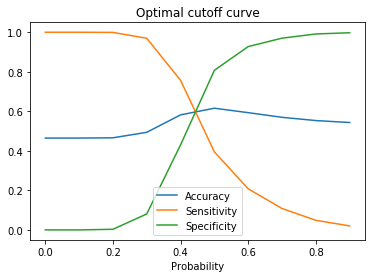

In [162]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

Metrics.plot.line(x = 'Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.title('Optimal cutoff curve')
plt.show()

**From the above graph, we have obtained our optimal cutoff value as 0.43.**

In [163]:
# Adding the column 'final_predicted' to our dataframe which is obtained with the cutoff value 0.43

Prob_11['Final_predicted'] = Prob_11.Predicted_prob.map(lambda x: 1 if x > 0.43 else 0)

Prob_11.head()

,Readmitted,Predicted_prob,Record,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.507926,83957,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.423119,3032,0,1,1,1,1,1,0,0,0,0,0,0
2,0,0.378070,25448,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.255275,84293,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.467901,50088,0,1,1,1,1,1,0,0,0,0,0,1


In [164]:
# Let's check the overall accuracy.

metrics.accuracy_score(Prob_11.Readmitted, Prob_11.Final_predicted)

0.5959526863331909

In [165]:
# Creating our final confusion matrix with probability cutoff at 0.43

confusion_matrix_2 = metrics.confusion_matrix(Prob_11.Readmitted, Prob_11.Final_predicted)
confusion_matrix_2

array([[19707, 17857],
       [10495, 22111]], dtype=int64)

In [166]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_2[1,1] # true positive 
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6781267251426117

In [168]:
# Let us calculate specificity

TN / float(TN+FP)

0.5246246406133532

### Precision Recall trade off

It can be helpful to pick a point on the chart that represents a nice mix of precision and recall, and then get a sense of how accurate the model is at that point.

In [169]:
# Importing precision and recall curve from sklearn

from sklearn.metrics import precision_recall_curve

Prob_11.Readmitted, Prob_11.Predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 70165    0
 70166    1
 70167    1
 70168    0
 70169    1
 Name: Readmitted, Length: 70170, dtype: int64, 0        1
 1        0
 2        0
 3        0
 4        0
         ..
 70165    0
 70166    1
 70167    0
 70168    0
 70169    0
 Name: Predicted, Length: 70170, dtype: int64)

In [170]:
p, r, thresholds = precision_recall_curve(Prob_11.Readmitted, Prob_11.Predicted_prob)

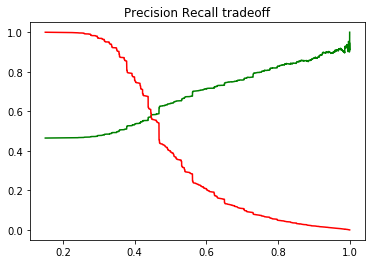

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall tradeoff')
plt.show()

**From the graph, the precision recall trade off value is 0.43. So, moving forward with the above scores.**

### Making predictions on the test set

In [172]:
# Assigning our final list of columns to 'X_test'

X_test_final = X_test[Features]
X_test_final.head()

,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,age_[0-10),age_[90-100),payer_code_BC,payer_code_CH,payer_code_PO,payer_code_SP,payer_code_WC,max_glu_serum_>300,repaglinide_Steady,glipizide_Down,glipizide_Up,pioglitazone_Up,rosiglitazone_Down,diabetesMed_No,Comorbidity_1,Comorbidity_3
100098,-0.21673,-0.504183,0.271517,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
58856,-0.21673,1.075921,0.271517,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
112,-0.21673,-0.504183,0.271517,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46386,-0.21673,-0.504183,0.815294,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
38112,-0.21673,0.285869,-0.272261,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [173]:
# Adding constant to X_test_final

X_test_final_sm = sm.add_constant(X_test_final)

In [174]:
# Making predictions on the test set

y_test_pred = Model_11.predict(X_test_final_sm)

In [175]:
y_test_pred[:10]

100098    0.415013
58856     0.539788
112       0.444898
46386     0.378070
38112     0.466385
86719     0.422129
68662     0.335544
67636     0.350874
34746     0.685167
35063     0.377657
dtype: float64

In [176]:
# Converting y_pred to a dataframe which is an array

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
100098,0.415013
58856,0.539788
112,0.444898
46386,0.378070
38112,0.466385


In [177]:
# Converting y_test to dataframe

df_test = pd.DataFrame(y_test)
df_test.head()

,readmitted
100098,0
58856,1
112,1
46386,0
38112,1


In [178]:
# Assigning record to index

df_test['Record'] = df_test.index

In [179]:
# Removing index for both dataframes to append them side by side

df_test_pred.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

In [180]:
# Appending both the dataframes

Prob_test = pd.concat([df_test, df_test_pred],axis = 1)

Prob_test.head()

,readmitted,Record,0
0,0,100098,0.415013
1,1,58856,0.539788
2,1,112,0.444898
3,0,46386,0.378070
4,1,38112,0.466385


In [181]:
# Renaming the column

Prob_test = Prob_test.rename(columns = { 0 : 'Predicted_prob'})

Prob_test.head()

,readmitted,Record,Predicted_prob
0,0,100098,0.415013
1,1,58856,0.539788
2,1,112,0.444898
3,0,46386,0.378070
4,1,38112,0.466385


In [182]:
# Calculating the final predicted values of test data using optimal cutoff 0.43

Prob_test['Final_predicted'] = Prob_test.Predicted_prob.map(lambda x: 1 if x > 0.43 else 0)

In [183]:
Prob_test.head()

,readmitted,Record,Predicted_prob,Final_predicted
0,0,100098,0.415013,0
1,1,58856,0.539788,1
2,1,112,0.444898,1
3,0,46386,0.378070,0
4,1,38112,0.466385,1


In [184]:
# Let's check the overall accuracy

metrics.accuracy_score(Prob_test.readmitted, Prob_test.Final_predicted)

0.5918733789984705

In [185]:
# Confusion matrix for our test data

confusion_matrix_4 = metrics.confusion_matrix(Prob_test.readmitted, Prob_test.Final_predicted)
confusion_matrix_4

array([[8451, 7806],
       [4468, 9349]], dtype=int64)

In [186]:
TP = confusion_matrix_4[1,1] # true positive 
TN = confusion_matrix_4[0,0] # true negatives
FP = confusion_matrix_4[0,1] # false positives
FN = confusion_matrix_4[1,0] # false negatives

In [187]:
# Let's see the sensitivity of our logistic regression model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.6766302381124701

In [188]:
# Let us calculate specificity

TN / float(TN+FP)

0.5198376084148367

In [189]:
# Let us calculate Precision

Precision = TP / float(TP+FP)
Precision

0.5449723112795104

In [190]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.6037065736794524

# Performance of Logistic model

Our Logistic Regression model evaluation metrics on test data with optimal cut off value of 0.43 are:

- **Accuracy - 59.1%**
- **Sensitivity - 67.6%**
- **Specificity - 51.9%**
- **Precision - 54.4%**
- **F1_score - 60.3%**

**Some of the important features affecting the readmission of a patient are:**

- **race_Caucasian**
- **Comorbidity_3**
- **Comorbidity_1**
- **diabetesMed_No**
- **number_inpatient**
- **number_emergency**
- **age_[90-100)**
- **number_diagnoses**
- **max_glu_serum_>300**

## Principal Component Analysis

As we have 133 components after creating dummies, we can use PCA for dimensionality reduction and build a logistic model or decision tree model on top of that data.

In [192]:
# Performing PCA on the data

from sklearn.decomposition import PCA

pca = PCA(random_state = 0)

pca.fit(X_train)

PCA(random_state=0)

In [193]:
# Extracting PCA components

pca.components_

array([[-4.51805257e-03,  1.50070921e-01, -1.96220582e-02, ...,
         9.52392610e-03, -3.38756505e-02,  4.66685080e-02],
       [-2.45035075e-01, -7.65376429e-02,  2.44067575e-01, ...,
         4.42902626e-02, -1.59466581e-02, -2.64562866e-02],
       [ 7.13295048e-01,  2.72044192e-01,  2.74969151e-01, ...,
        -1.14523298e-02, -1.67381586e-03,  1.70922485e-02],
       ...,
       [-0.00000000e+00, -5.55111512e-17,  1.10336088e-16, ...,
        -7.09562614e-04, -7.09562614e-04, -7.09562614e-04],
       [-0.00000000e+00,  1.73472348e-17, -6.65724117e-17, ...,
         3.34448898e-03,  3.34448898e-03,  3.34448898e-03],
       [-0.00000000e+00,  4.85722573e-17, -2.88898610e-17, ...,
        -3.23579044e-03, -3.23579044e-03, -3.23579044e-03]])

In [194]:
# Calculating Variance

pca.explained_variance_ratio_

array([1.24612402e-01, 8.62640788e-02, 7.28689890e-02, 6.71308770e-02,
       6.03803405e-02, 5.78923837e-02, 5.46111917e-02, 4.98251281e-02,
       4.29828653e-02, 3.89829681e-02, 3.66451378e-02, 2.95571228e-02,
       2.60209298e-02, 2.36984202e-02, 2.10726476e-02, 1.81593121e-02,
       1.64508508e-02, 1.51893473e-02, 1.28967759e-02, 1.25884932e-02,
       1.14715669e-02, 1.07618583e-02, 9.91677505e-03, 8.47047508e-03,
       8.32707031e-03, 7.87110460e-03, 6.88151294e-03, 6.79689507e-03,
       5.86425165e-03, 5.26352610e-03, 5.11812865e-03, 3.58919142e-03,
       3.35818221e-03, 2.73816443e-03, 2.55288540e-03, 2.45230204e-03,
       2.39420043e-03, 2.23131154e-03, 2.21892351e-03, 2.01195039e-03,
       1.72529879e-03, 1.68029288e-03, 1.52884555e-03, 1.41541339e-03,
       1.18853966e-03, 1.15820619e-03, 1.07790981e-03, 9.99780058e-04,
       9.73532185e-04, 9.25964424e-04, 8.08339042e-04, 7.95807142e-04,
       7.77173475e-04, 7.68807915e-04, 6.63830691e-04, 6.42441308e-04,
      

Text(0, 0.5, 'Eigen Values')

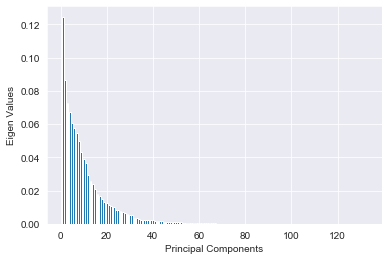

In [195]:
# Plotting variance ratio 

sns.set_style('darkgrid')
plt.bar(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

In [196]:
# As we have more than 150 columns, lets check the cumulative variance to identify how many components explain 90% of data

var_cumu = np.cumsum(pca.explained_variance_ratio_)

### Scree Plot

Text(0, 0.5, 'Eigen Values')

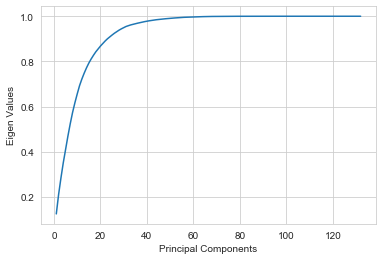

In [197]:
sns.set_style('whitegrid')
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

**From the above scree plot, 30 components explain about 95% of our data and 25 components explain about 90% of our data.**

In [198]:
# We will go with 30 PCs as they are explaining 95% of the data which we can see from the plot.

pc30 = PCA(n_components = 30, random_state = 0)

In [199]:
# Lets transform our train and test data with PCA

pc30.fit(X_train)

X_train_pca = pc30.transform(X_train)
X_test_pca = pc30.transform(X_test)

In [200]:
# Lets check their shape

print(X_train_pca.shape)
print(X_test_pca.shape)

(70170, 30)
(30074, 30)


## PCA with Logistic Regression

In [201]:
# Lets build Logistic regression model over PCA using the 'Pipeline' from sklearn library.
# We are generating the pipeline with 30 components and using logistic model on these components.

from sklearn.pipeline import Pipeline

pca = PCA(n_components = 30)
logreg = LogisticRegression(random_state = 100) 

pipe = Pipeline([('pca', pca), ('logistic', logreg)])

In [202]:
# Fitting the pipeline to our train data

pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=30)),
                ('logistic', LogisticRegression(random_state=100))])

In [203]:
# Lets check the score on our train data

pipe.score(X_train, y_train)

0.618255664814023

In [204]:
# Evaluation on our test data

y_pred = pipe.predict(X_test)

In [205]:
# Confusion matrix

confusion_matrix_5 = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix_5)

[[12833  3424]
 [ 7981  5836]]


In [206]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.6207687703664295


In [207]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_5[1,1] # true positive 
TN = confusion_matrix_5[0,0] # true negatives
FP = confusion_matrix_5[0,1] # false positives
FN = confusion_matrix_5[1,0] # false negatives

In [208]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.4223782297170153

In [209]:
# Let us calculate specificity

TN / float(TN+FP)

0.7893830350003076

**Our PCA with Logistic regression model evaluation metrics on our test data without hyperparameter tuning are:**

- **Accuracy - 62.0%**
- **Sensitivity - 42.2%**
- **Specificity - 78.9%**

### Hyperparameter tuning for PCA with Logistic Regression

In [210]:
# We will now tune our model with both 30 and 25 principal components

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

pca = PCA()

logreg = LogisticRegression(random_state = 100)

pipe = Pipeline([('pca', pca), ('logistic', logreg)])

# Hyperparameter tuning

params = {'pca__n_components': [30, 25], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# Creating 3 folds

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

model = GridSearchCV(estimator = pipe, cv = folds, param_grid = params, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [211]:
# Fitting our model

model.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(random_state=100))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [30, 25]},
             scoring='roc_auc', verbose=1)

In [212]:
# Cross validation results

pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.486778,0.008282,0.000000,0.000000,0.1,l1,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,32
1,3.212269,0.038324,0.000000,0.000000,0.1,l1,25,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,20
2,3.684801,0.081101,0.229944,0.030112,0.1,l2,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.655447,0.654414,0.658033,0.655965,0.001522,1
3,3.389678,0.092874,0.188836,0.048185,0.1,l2,25,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.655187,0.653430,0.658365,0.655661,0.002042,10
4,3.389348,0.018127,0.000000,0.000000,0.5,l1,30,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,23
5,3.164076,0.034407,0.000000,0.000000,0.5,l1,25,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,24
6,3.686133,0.049179,0.190509,0.031111,0.5,l2,30,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.655434,0.654419,0.658027,0.655960,0.001519,2
7,3.372634,0.040649,0.163770,0.003104,0.5,l2,25,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.655183,0.653428,0.658366,0.655659,0.002044,12
8,3.322165,0.084751,0.000000,0.000000,1,l1,30,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,27
9,3.138012,0.050209,0.000000,0.000000,1,l1,25,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,30


In [213]:
# Extracting best hyperparameters

print("AUC: ", model.best_score_)
print("Hyperparameters: ", model.best_params_)

AUC:  0.655964737799798
Hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 30}


In [214]:
# Evaluation on our test data

y_pred = model.predict(X_test)

In [215]:
# Confusion matrix

confusion_matrix_6 = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix_6)

[[12837  3420]
 [ 7981  5836]]


In [216]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.620901775620137


In [217]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_6[1,1] # true positive 
TN = confusion_matrix_6[0,0] # true negatives
FP = confusion_matrix_6[0,1] # false positives
FN = confusion_matrix_6[1,0] # false negatives

In [218]:
# Let's see the sensitivity of our logistic regression model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.4223782297170153

In [219]:
# Let us calculate specificity

TN / float(TN+FP)

0.7896290828566156

In [220]:
# Let us calculate Precision

Precision = TP / float(TP+FP)
Precision

0.6305099394987036

In [221]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.5058726650197201

**Our PCA with Logistic regression model evaluation metrics after hyperparameter tuning are:**

- **Accuracy - 62.0%**
- **Sensitivity - 42.2%**
- **Specificity - 78.9%**
- **Precision - 63.0%**
- **F1_score - 50.5%**


## PCA with Random Forests

In [222]:
# Importing random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters

rfc = RandomForestClassifier(random_state = 100)

In [223]:
# Fitting our model on PCA transformed data

rfc.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=100)

In [224]:
# Making predictions on PCA transformed test data

predictions = rfc.predict(X_test_pca)

In [225]:
# Confusion matrix

confusion_matrix_7 = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix_7)

[[11844  4413]
 [ 7051  6766]]


In [226]:
print(metrics.accuracy_score(y_test,predictions))

0.6188069428742435


In [227]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_7[1,1] # true positive 
TN = confusion_matrix_7[0,0] # true negatives
FP = confusion_matrix_7[0,1] # false positives
FN = confusion_matrix_7[1,0] # false negatives

In [228]:
# Let's see the sensitivity of our model

TP / float(TP+FN)

0.4896866179344286

In [229]:
# Let us calculate specificity

TN / float(TN+FP)

0.7285477025281417

**Our PCA with Random Forest model evaluation metrics on our test data without hyperparameter tuning are:**

- **Accuracy - 61.8%**
- **Sensitivity - 48.9%**
- **Specificity - 72.8%**

### Hyperparameter tuning for PCA with Random Forest

In [230]:
# Tuning 'max_depth'

from sklearn.model_selection import KFold

# Specify number of folds for k-fold CV

n_folds = 3

# Parameters to build the model

parameters = {'max_depth': range(2, 20, 5)}

# Instantiate the model

rfc = RandomForestClassifier(random_state = 100)


# Fitting tree on PCA transformed data

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [231]:
# Cross validation results

results_1 = pd.DataFrame(model.cv_results_)
results_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.798381,0.066392,0.309824,0.013625,2,{'max_depth': 2},0.605045,0.604660,0.599572,0.603092,0.002494,4,0.605750,0.603869,0.605921,0.605180,0.000930
1,32.759446,0.123145,0.408753,0.005450,7,{'max_depth': 7},0.615348,0.613938,0.613852,0.614379,0.000686,3,0.628730,0.630269,0.633390,0.630797,0.001939
2,48.602239,0.402041,0.600930,0.005922,12,{'max_depth': 12},0.619153,0.620180,0.619025,0.619453,0.000517,1,0.752907,0.755750,0.754104,0.754254,0.001166
3,51.540719,6.307017,0.669124,0.054498,17,{'max_depth': 17},0.619923,0.620308,0.617572,0.619267,0.001209,2,0.939996,0.942497,0.942091,0.941528,0.001096


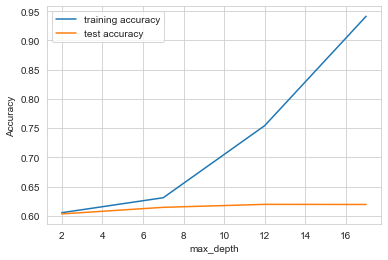

In [232]:
# Plotting accuracy 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score increases at a slow pace. The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.**

In [233]:
# Tuning 'n_estimators' with 'max_depth = 7'

n_folds = 3

parameters = {'n_estimators': range(100, 1500, 400)}

rfc = RandomForestClassifier(max_depth = 7, random_state = 100)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 13.8min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=7, random_state=100),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [234]:
# Cross validation results

results_2 = pd.DataFrame(model.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,32.874416,0.178675,0.426132,0.035449,100,{'n_estimators': 100},0.615348,0.613938,0.613852,0.614379,0.000686,4,0.628730,0.630269,0.633390,0.630797,0.001939
1,162.533195,0.547776,2.009343,0.039407,500,{'n_estimators': 500},0.614451,0.615006,0.614151,0.614536,0.000354,3,0.627811,0.631744,0.633433,0.630996,0.002355
2,300.435420,1.113425,3.659987,0.192825,900,{'n_estimators': 900},0.614664,0.615562,0.614365,0.614864,0.000509,1,0.628196,0.631915,0.633540,0.631217,0.002237
3,375.661315,31.568137,4.367115,0.093272,1300,{'n_estimators': 1300},0.614493,0.615135,0.614280,0.614636,0.000363,2,0.628089,0.632108,0.633861,0.631352,0.002416


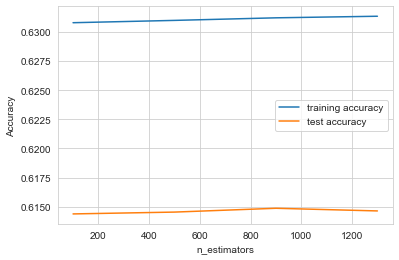

In [235]:
# Plotting accuracy 

plt.figure()

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [236]:
# Tuning 'max_features' which is the maximum number of features considered for splitting at a node with 'max_depth = 7'

n_folds = 3

parameters = {'max_features': [4, 8, 14, 20, 24]}

rfc = RandomForestClassifier(max_depth = 7, random_state = 100)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.8min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=7, random_state=100),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [237]:
# Cross validation results

results_3 = pd.DataFrame(model.cv_results_)
results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.027871,0.120744,0.403072,0.008855,4,{'max_features': 4},0.613467,0.614408,0.613467,0.613781,0.000443,5,0.628046,0.630718,0.631894,0.630219,0.001610
1,50.251235,0.312193,0.420451,0.002061,8,{'max_features': 8},0.613938,0.616759,0.613596,0.614764,0.001418,4,0.629222,0.631744,0.633925,0.631630,0.001922
2,85.095616,0.217335,0.416106,0.004332,14,{'max_features': 14},0.614536,0.617443,0.614878,0.615619,0.001297,3,0.633989,0.638585,0.638991,0.637188,0.002268
3,119.684496,0.508647,0.423125,0.002953,20,{'max_features': 20},0.616546,0.620051,0.616759,0.617785,0.001605,1,0.639012,0.640616,0.641513,0.640381,0.001035
4,121.534819,10.731980,0.330878,0.029141,24,{'max_features': 24},0.616717,0.618512,0.617230,0.617486,0.000755,2,0.639034,0.640936,0.642518,0.640829,0.001425


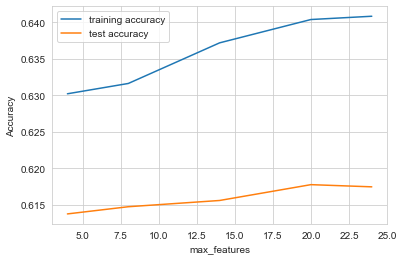

In [238]:
# Plotting accuracy

plt.figure()

plt.plot(results_3["param_max_features"], 
         results_3["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_3["param_max_features"], 
         results_3["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [239]:
# Tuning 'min_samples_leaf' which is the minimum number of samples required to be at a leaf node with 'max_depth = 7'

n_folds = 3

parameters = {'min_samples_leaf': range(100, 400, 50)}

rfc = RandomForestClassifier(max_depth = 7, random_state = 100)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.5min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=7, random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [240]:
# Cross validation results

results_4 = pd.DataFrame(model.cv_results_)
results_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,31.811423,0.281302,0.431145,0.022284,100,{'min_samples_leaf': 100},0.613938,0.613980,0.612612,0.613510,0.000635,6,0.621783,0.624177,0.626251,0.624070,0.001826
1,31.413149,0.102867,0.419783,0.024372,150,{'min_samples_leaf': 150},0.613211,0.614664,0.613467,0.613781,0.000633,4,0.621227,0.624263,0.624177,0.623222,0.001411
2,30.837017,0.047899,0.418514,0.013420,200,{'min_samples_leaf': 200},0.613467,0.614237,0.613467,0.613724,0.000363,5,0.619517,0.621804,0.623236,0.621519,0.001532
3,30.508351,0.079383,0.418113,0.004332,250,{'min_samples_leaf': 250},0.613980,0.614493,0.613938,0.614137,0.000253,1,0.618833,0.622617,0.622574,0.621341,0.001774
4,29.915888,0.192792,0.426133,0.008063,300,{'min_samples_leaf': 300},0.613638,0.614493,0.614280,0.614137,0.000363,1,0.618234,0.621248,0.622253,0.620579,0.001708
5,22.765090,4.837126,0.328540,0.061967,350,{'min_samples_leaf': 350},0.613852,0.614151,0.613681,0.613895,0.000194,3,0.618512,0.621419,0.621590,0.620507,0.001413


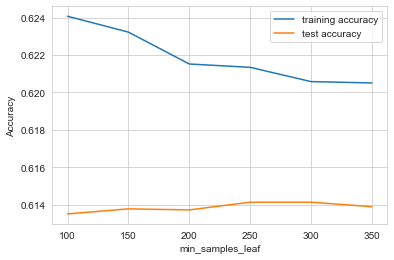

In [241]:
# Plotting accuracy 

plt.figure()

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [242]:
# Tuning 'min_samples_split' with 'max_depth = 7'

n_folds = 3

parameters = {'min_samples_split': range(200, 500, 50)}

rfc = RandomForestClassifier(max_depth = 7, random_state = 100)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.6min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=7, random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [243]:
# Cross validation results

results_5 = pd.DataFrame(model.cv_results_)
results_5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,32.351934,0.120029,0.416279,0.008690,200,{'min_samples_split': 200},0.613168,0.614493,0.612740,0.613467,0.000746,2,0.623001,0.624455,0.625951,0.624469,0.001204
1,32.353701,0.205814,0.415053,0.016408,250,{'min_samples_split': 250},0.612227,0.613767,0.613211,0.613068,0.000636,6,0.622146,0.624134,0.625844,0.624042,0.001511
2,32.422553,0.054131,0.418113,0.014204,300,{'min_samples_split': 300},0.613125,0.614493,0.612740,0.613453,0.000752,3,0.621890,0.625481,0.625652,0.624341,0.001735
3,32.383029,0.132276,0.428139,0.003569,350,{'min_samples_split': 350},0.612869,0.614109,0.612997,0.613325,0.000557,4,0.620735,0.623771,0.624861,0.623122,0.001746
4,32.134861,0.139615,0.407417,0.011055,400,{'min_samples_split': 400},0.612185,0.613382,0.614109,0.613225,0.000793,5,0.620158,0.624241,0.625524,0.623308,0.002288
5,24.998929,5.150188,0.331883,0.058848,450,{'min_samples_split': 450},0.612527,0.614622,0.613809,0.613653,0.000862,1,0.619218,0.622702,0.625118,0.622346,0.002422


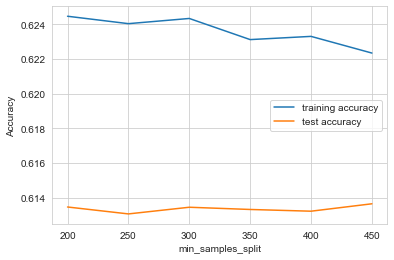

In [244]:
# Plotting accuracy 

plt.figure()

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [245]:
# Fitting the final model with the best parameters obtained from the graph's

rfc = RandomForestClassifier(bootstrap = True,
                             max_depth = 7,
                             min_samples_leaf = 250, 
                             min_samples_split = 300,
                             max_features = 20,
                             n_estimators = 900, 
                             random_state = 100)

In [246]:
# Fitting our final model on our PCA transformed train data

rfc.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=7, max_features=20, min_samples_leaf=250,
                       min_samples_split=300, n_estimators=900,
                       random_state=100)

In [247]:
# Predictions on our PCA transformed test data

predictions = rfc.predict(X_test_pca)

In [248]:
# Confusion matrix

confusion_matrix_8 = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix_8)

[[12827  3430]
 [ 7965  5852]]


In [249]:
print(metrics.accuracy_score(y_test, predictions))

0.6211012835006983


In [250]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_8[1,1] # true positive 
TN = confusion_matrix_8[0,0] # true negatives
FP = confusion_matrix_8[0,1] # false positives
FN = confusion_matrix_8[1,0] # false negatives

In [251]:
# Let's see the sensitivity of our model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.42353622349279874

In [252]:
# Let us calculate specificity

TN / float(TN+FP)

0.7890139632158455

In [253]:
# Let us calculate Precision

Precision = TP / float(TP+FP)
Precision

0.6304675716440422

In [254]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.5066886012381487

**Our PCA with Random Forest model evaluation metrics on our test data after hyperparameter tuning are:**

- **Accuracy - 62.1%**
- **Sensitivity - 42.3%**
- **Specificity - 78.9%**
- **Precision - 63.0%**
- **F1_score - 50.6%**

# Stratify your population into 3 risk buckets

- High risk (Probability of readmission > 0.7)
- Medium risk (0.3 < Probability of readmission < 0.7)
- Low risk (Probability of readmission < 0.3)

In [255]:
# Stratifying the population based on the 'Predicted_prob' of readmission.

conditions = [(Prob_test['Predicted_prob'] < 0.3), 
              (Prob_test['Predicted_prob'] >= 0.3) & (Prob_test['Predicted_prob'] < 0.7), 
              (Prob_test['Predicted_prob'] >= 0.7)]

values = ['Low risk', 'Medium risk', 'High risk']

Prob_test['Risk_of_Readmission'] = np.select(conditions, values)

Prob_test.head()

,readmitted,Record,Predicted_prob,Final_predicted,Risk_of_Readmission
0,0,100098,0.415013,0,Medium risk
1,1,58856,0.539788,1,Medium risk
2,1,112,0.444898,1,Medium risk
3,0,46386,0.378070,0,Medium risk
4,1,38112,0.466385,1,Medium risk


In [256]:
Prob_test.set_index('Record', inplace = True)
Prob_test.head()

,readmitted,Predicted_prob,Final_predicted,Risk_of_Readmission
Record,,,,
100098,0,0.415013,0,Medium risk
58856,1,0.539788,1,Medium risk
112,1,0.444898,1,Medium risk
46386,0,0.378070,0,Medium risk
38112,1,0.466385,1,Medium risk


# Overall performance of each model

**I have built the following models:**

1. **Logistic Regression model**

    - **Accuracy - 59.1%**
    - **Sensitivity - 67.6%**
    - **Specificity - 51.9%**
    - **Precision - 54.4%**
    - **F1_score - 60.3%**


2. **PCA with Logistic regression model**

    - **Accuracy - 62.0%**
    - **Sensitivity - 42.2%**
    - **Specificity - 78.9%**
    - **Precision - 63.0%**
    - **F1_score - 50.5%**

3. **PCA with Random Forest model**

    - **Accuracy - 62.1%**
    - **Sensitivity - 42.3%**
    - **Specificity - 78.9%**
    - **Precision - 63.0%**
    - **F1_score - 50.6%**
    
**Among all the three models, Logistic regression has given good results when compared with that of the others. So, logistic model will be useful in predicting the risk of readmission.**

**Based on the results of logistic model, some of the important features affecting the readmission of a patient are:**

- **race_Caucasian**
- **Comorbidity_3**
- **Comorbidity_1**
- **diabetesMed_No**
- **number_inpatient**
- **number_emergency**
- **age_[90-100)**
- **number_diagnoses**
- **max_glu_serum_>300**